## Create visualizations for high wage jobs in California

Need to begin by specifying the desired year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from datetime import datetime
from jqi_functions import *
import plotly.express as px
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
year = '2020'
col_year = '2019'

In [3]:
data = pd.read_csv(f'data/outputs/hw_outputs_{year}.csv')

In [4]:
county_info = pd.read_csv('data/county_to_regions_key.csv')

In [5]:
cost_of_living = pd.read_csv(f'data/cost_of_living/united-way-col-1A1PS1C{col_year}.csv') # 1 adult, 1 preschooler, 1 child

In [6]:
data.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  
0            18315          154200.0           63149  
1            18623          156800.0           63149  
2            18279          153900.0           63149  
3            11354           95600.0           63149  
4            12174          102500.0           63149

### Histogram of wages by industry

In [7]:
ca_ipums = cleaned_ipums(year)

In [8]:
ca_ipums.head()

YEAR  COUNTYFIP  INDNAICS  PERWT  INCWAGE NAICS Code Industry Title  \
0  2020         73  928110p4   79.0    62000   928110p4     us marines   
1  2020         73  928110p4   64.0    24000   928110p4     us marines   
2  2020         73  928110p4   66.0    30000   928110p4     us marines   
3  2020         73  928110p4   58.0    24000   928110p4     us marines   
4  2020         73  928110p4   75.0    20000   928110p4     us marines   

     Industry  Crosswalk Value  
0  us marines               36  
1  us marines               36  
2  us marines               36  
3  us marines               36  
4  us marines               36

In [105]:
ca_ipums = ca_ipums.loc[ca_ipums.index.repeat(ca_ipums.PERWT)].reset_index(drop=True)

In [106]:
ca_ipums_wages = ca_ipums.groupby(by=['Crosswalk Value']).mean()

In [107]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CERF Regions']).mean()

In [108]:
ca_ipums_minelog = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 1) |
                               (ca_ipums['Crosswalk Value'] == 3)]

ca_ipums_farm = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 2)]

ca_ipums_const = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 3) |
                             (ca_ipums['Crosswalk Value'] == 4) |
                             (ca_ipums['Crosswalk Value'] == 5) |
                             (ca_ipums['Crosswalk Value'] == 6) |
                             (ca_ipums['Crosswalk Value'] == 7)]

ca_ipums_manu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 8) |
                            (ca_ipums['Crosswalk Value'] == 9) |
                            (ca_ipums['Crosswalk Value'] == 10)]

ca_ipums_ttu = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 11) |
                           (ca_ipums['Crosswalk Value'] == 12) |
                           (ca_ipums['Crosswalk Value'] == 13) |
                           (ca_ipums['Crosswalk Value'] == 14) |
                           (ca_ipums['Crosswalk Value'] == 15) |
                           (ca_ipums['Crosswalk Value'] == 16) |
                           (ca_ipums['Crosswalk Value'] == 17)]

ca_ipums_info = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 18)]

ca_ipums_fin = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 19) |
                           (ca_ipums['Crosswalk Value'] == 20) |
                           (ca_ipums['Crosswalk Value'] == 21)]

ca_ipums_prof = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 22) |
                            (ca_ipums['Crosswalk Value'] == 23) |
                            (ca_ipums['Crosswalk Value'] == 24) |
                            (ca_ipums['Crosswalk Value'] == 25)]

ca_ipums_eduhealth = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 26) |
                                 (ca_ipums['Crosswalk Value'] == 27) |
                                 (ca_ipums['Crosswalk Value'] == 28)]

ca_ipums_leisure = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 29) |
                               (ca_ipums['Crosswalk Value'] == 30) |
                               (ca_ipums['Crosswalk Value'] == 31)]

ca_ipums_other = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 32) |
                             (ca_ipums['Crosswalk Value'] == 33) |
                             (ca_ipums['Crosswalk Value'] == 34) |
                             (ca_ipums['Crosswalk Value'] == 35) |
                             (ca_ipums['Crosswalk Value'] == 0)]

ca_ipums_gov = ca_ipums.loc[(ca_ipums['Crosswalk Value'] == 36) |
                           (ca_ipums['Crosswalk Value'] == 37) |
                           (ca_ipums['Crosswalk Value'] == 38)]

In [109]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [110]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [111]:
ca_col = cost_of_living['Cost of Living'][13]

In [112]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        avg_ind_wage = np.mean(df_lists[i]['INCWAGE'])
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Distribution of Wages', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        
        y, x_, _ = ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        
        ax[n_row, n_col].vlines(x=ca_col, ymin=0, ymax=y.max(),
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
        ax[n_row, n_col].vlines(x=avg_ind_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, ls='dashed', label=f'Average Wage of {titles[i]}: $ {round(avg_ind_wage)}')
        
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        
        handles, labels = ax[n_row, n_col].get_legend_handles_labels()
        ax[n_row, n_col].legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.75), loc='upper left', fontsize=12)
        
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

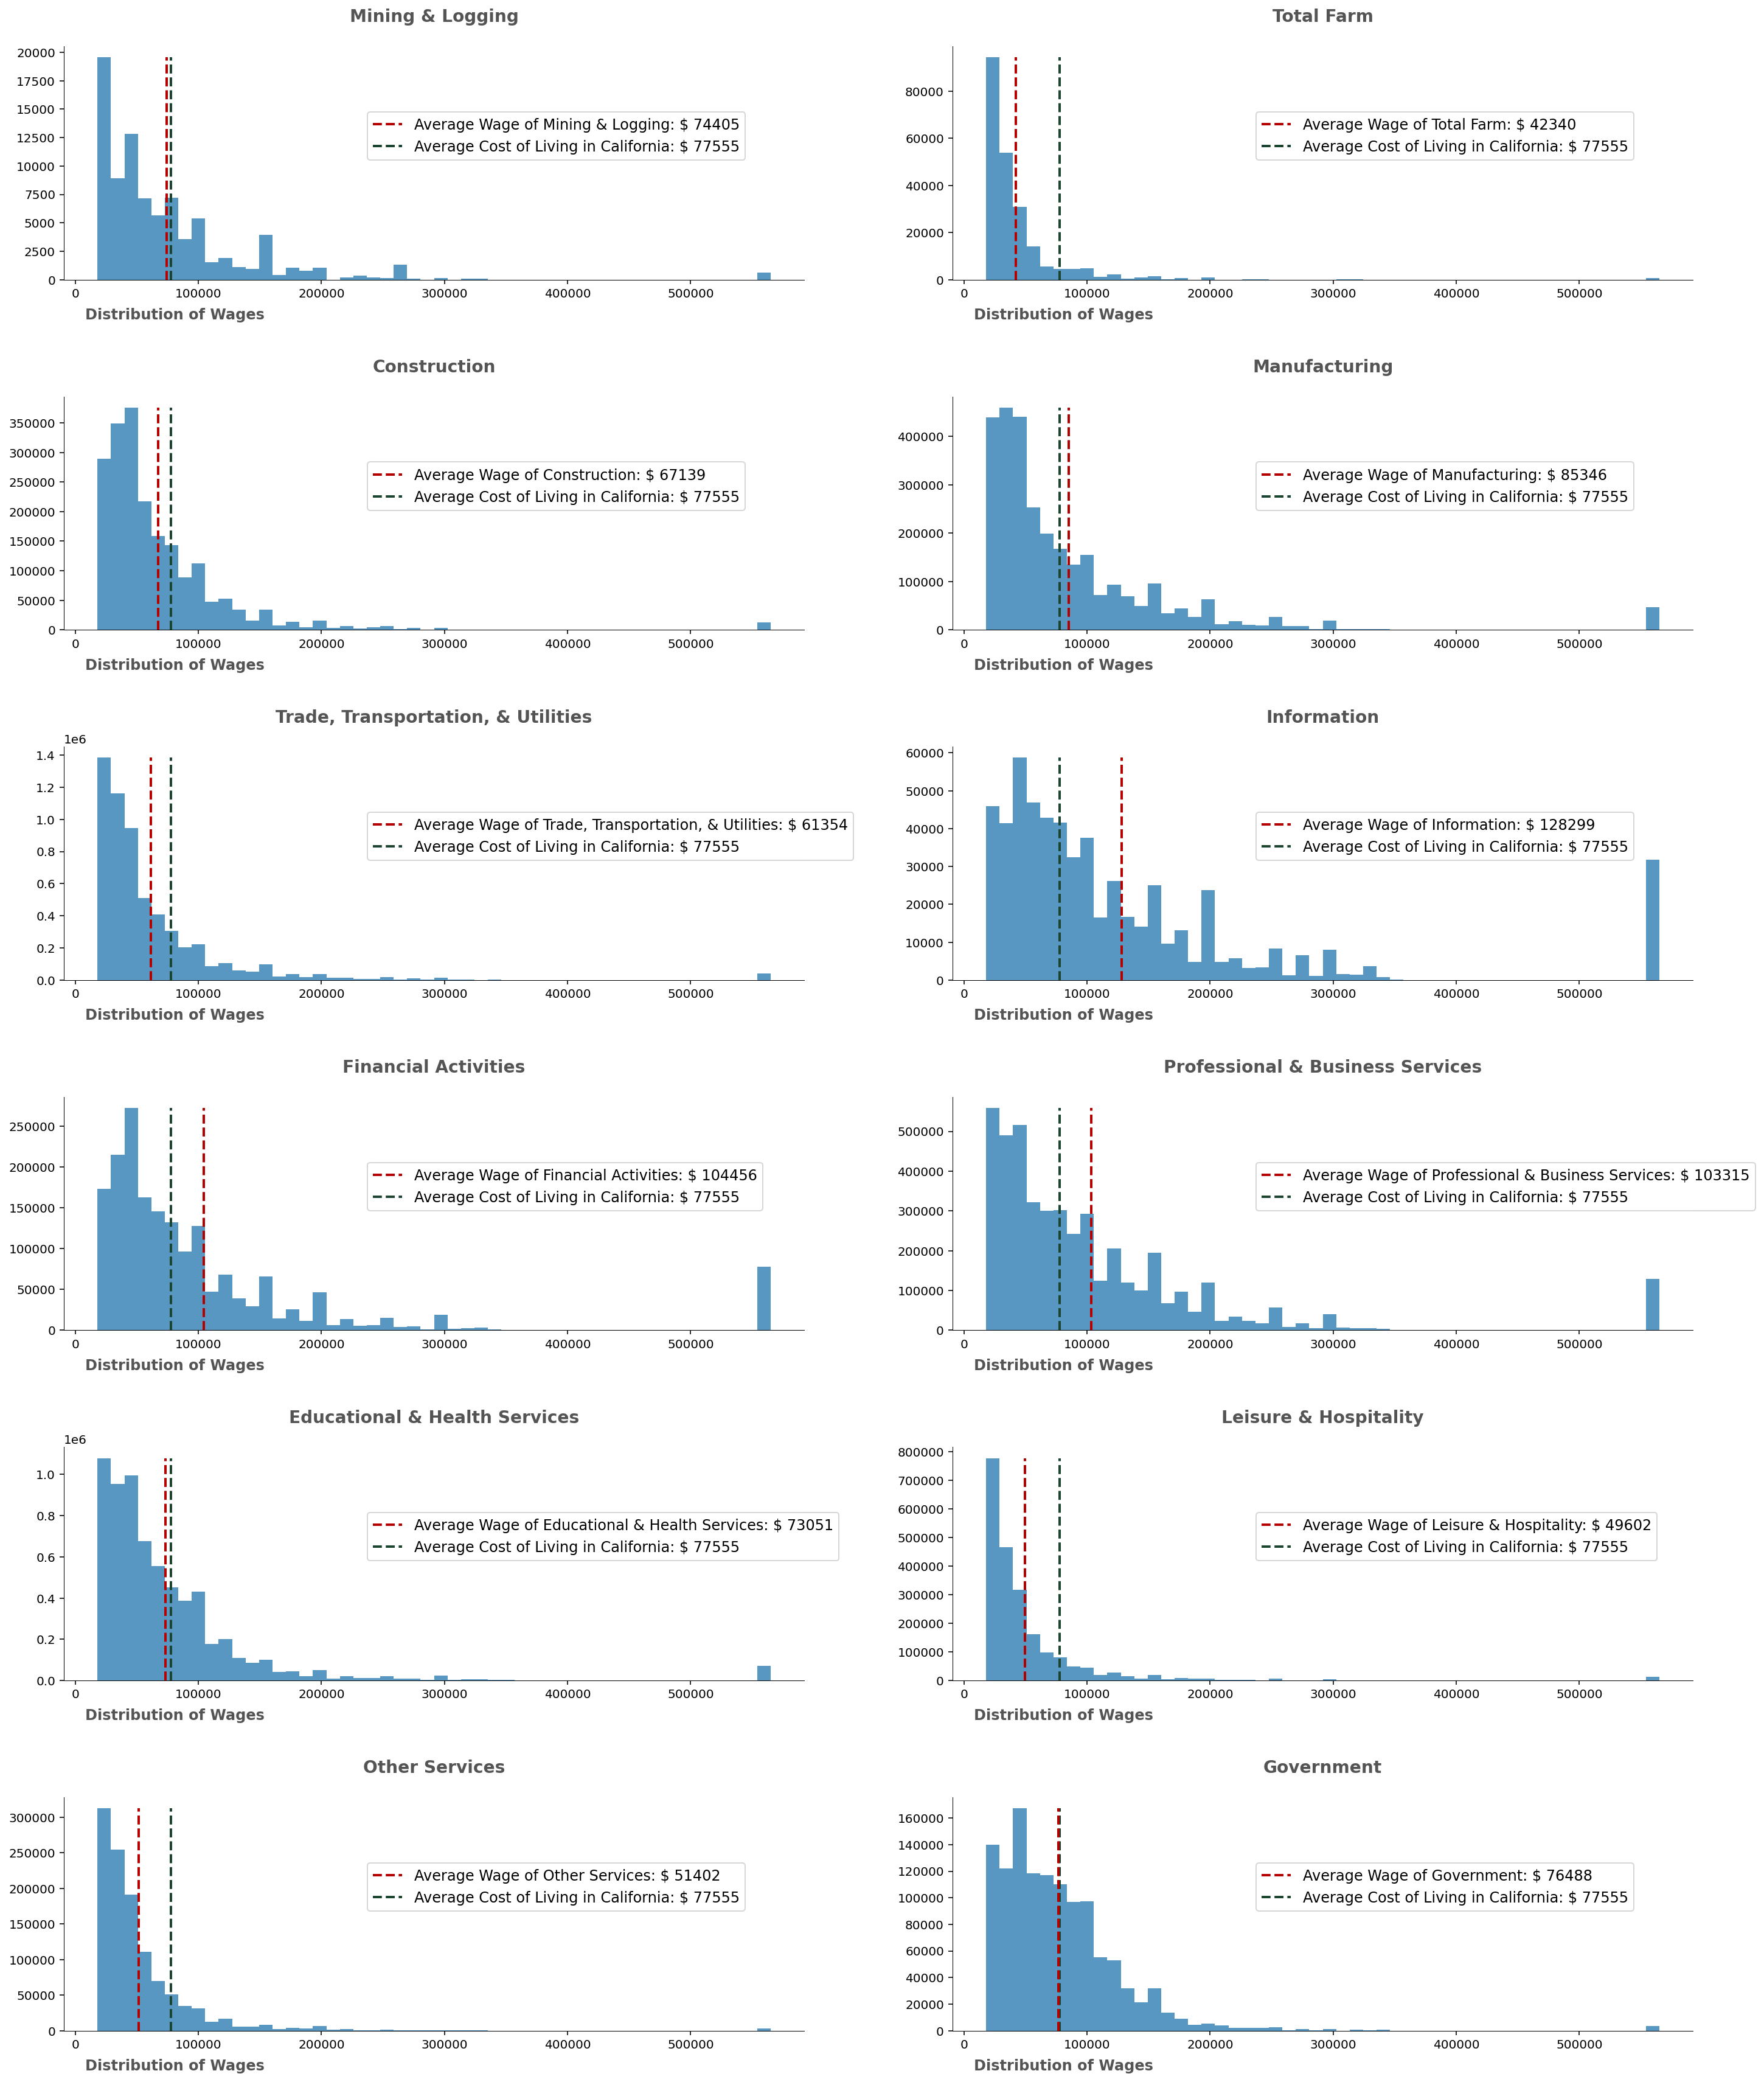

In [113]:
plot_hist(main_ind_dfs, main_ind_titles)

In [114]:
ca_ipums_wages_regions = ca_ipums_wages_regions.sort_values('INCWAGE')
ca_ipums_wages_regions

YEAR  COUNTYFIP       PERWT        INCWAGE  \
CERF Regions                                                         
Kern                  2020.0  29.000000  266.518392   56431.017876   
Inland Empire         2020.0  67.838069  233.340407   58688.965953   
Northern San Joaquin  2020.0  80.246919  231.856205   59679.296455   
Central San Joaquin   2020.0  43.357466  229.268594   59779.073769   
North State           2020.0  43.652011  187.856417   62590.676177   
Redwood Coast         2020.0  23.000000  193.483849   63621.507114   
Los Angeles           2020.0  37.000000  191.369604   68880.287623   
Sacramento            2020.0  66.327811  206.310199   71649.173555   
San Diego-Imperial    2020.0  71.546882  217.565476   74350.513453   
Central Coast         2020.0  95.847066  204.112867   75590.230762   
Orange                2020.0  59.000000  203.187737   82214.362994   
Bay Area              2020.0  54.273362  198.298757  103353.656497   

                      Crosswalk Value    Population  
CERF Regions                                         
Kern                        18.533775  8.876410e+05  
Inland Empire               19.098251  2.287317e+06  
Northern San Joaquin        17.660352  6.057942e+05  
Central San Joaquin         19.414123  7.226995e+05  
North State                 20.389746  2.049857e+05  
Redwood Coast               21.060957  1.359400e+05  
Los Angeles                 20.062355  1.008157e+07  
Sacramento                  21.260584  1.116109e+06  
San Diego-Imperial          20.506021  3.221155e+06  
Central Coast               19.642652  5.780028e+05  
Orange                      19.469216  3.168044e+06  
Bay Area                    19.932290  1.265061e+06

In [117]:
avg_wage = ca_ipums['INCWAGE'].mean()
avg_wage

76633.89122086526

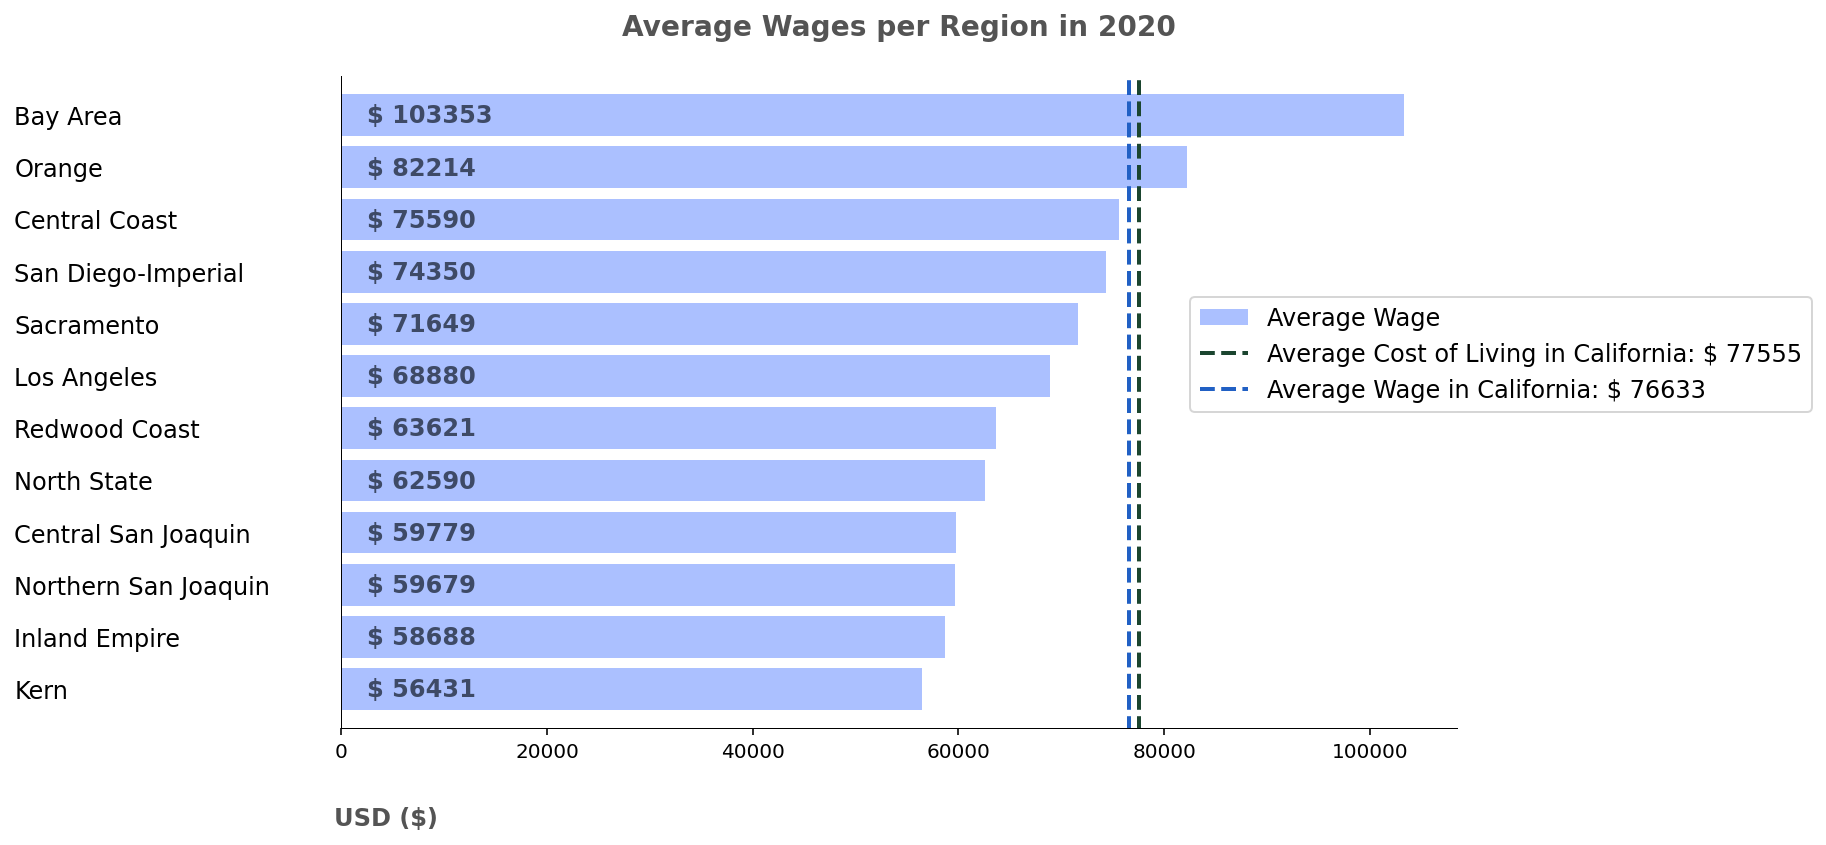

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), ca_ipums_wages_regions['INCWAGE'].values, color='#abc0ff', label="Average Wage")

ax.set_yticks(np.arange(12))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=12, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=12, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 11.75)

ax.set_title(f'Average Wages per Region in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(ca_ipums_wages_regions)):
    ax.annotate(f"$ {int(ca_ipums_wages_regions['INCWAGE'].values[i])}", (2500, -0.15+i), size=12, weight='bold', color='#3e4a66', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.75, 0.68), loc='upper left', fontsize=12)
plt.show()

In [119]:
col_regions = cost_of_living[0:13].groupby('Regions').mean().sort_values('Cost of Living')
col_regions

Cost of Living
Regions                             
Kern                           54862
Central San Joaquin            56000
Northern San Joaquin           57805
North State                    58128
Redwood Coast                  58613
Eastern Sierra                 61261
Sacramento                     63097
Inland Empire                  63149
San Diego-Imperial             77956
Central Coast                  78200
Los Angeles                    80216
Orange                         87648
Bay Area                       97249

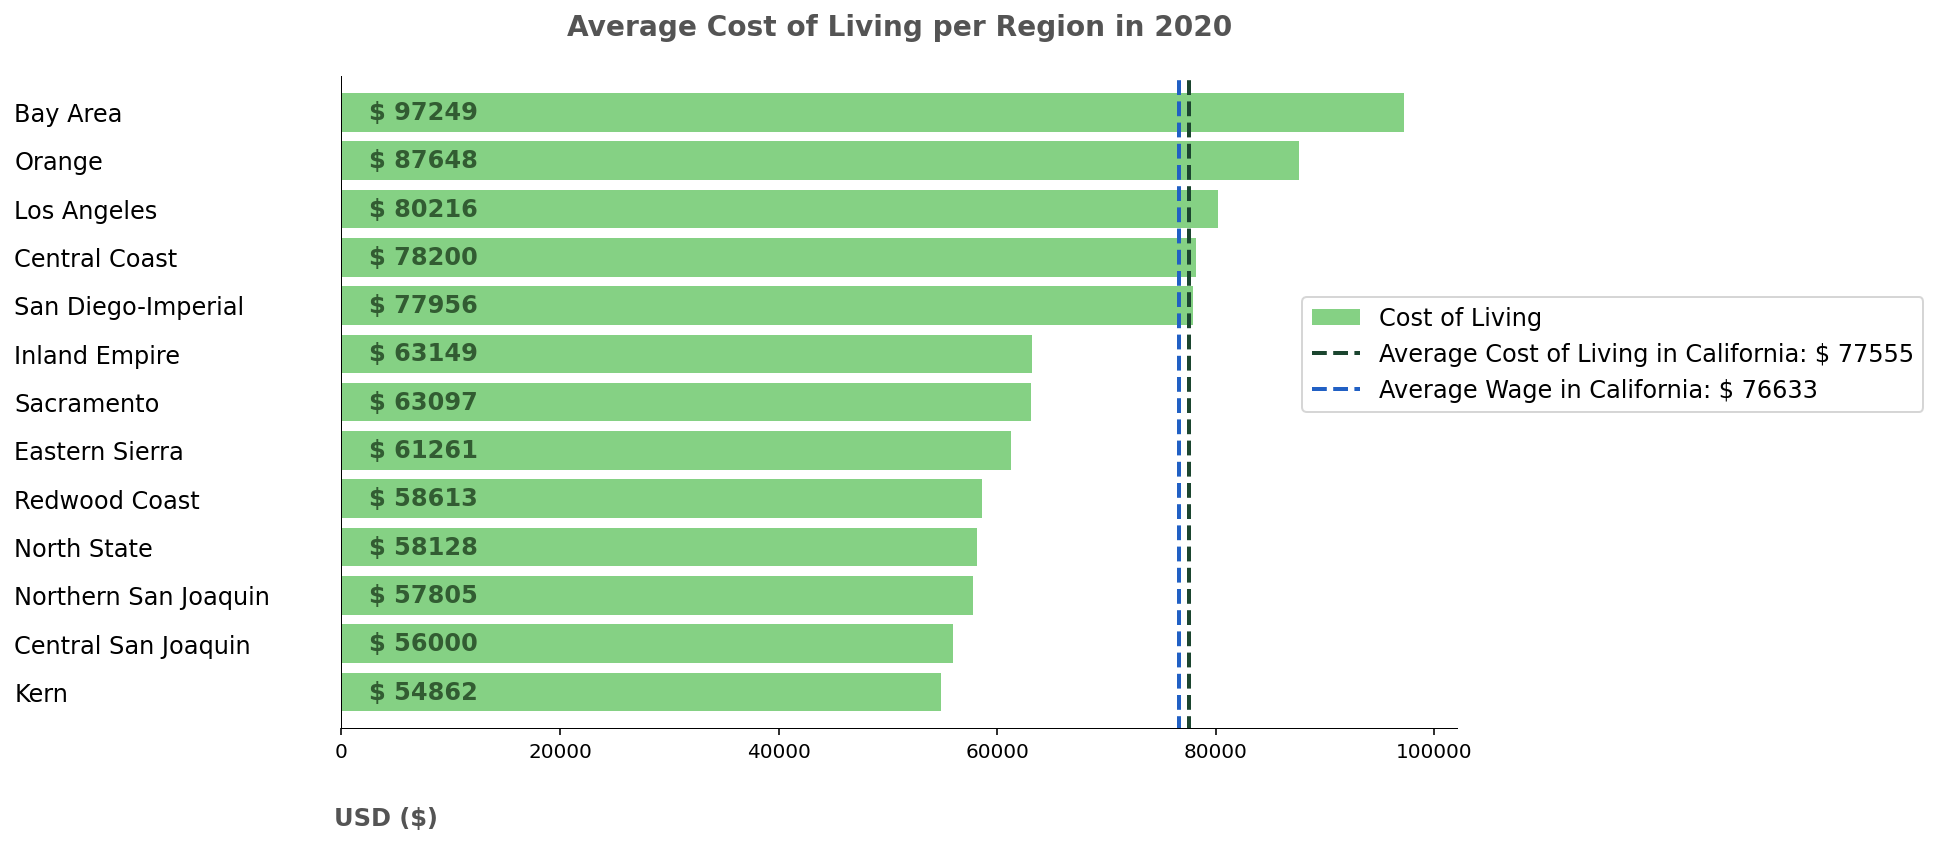

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(13), col_regions['Cost of Living'].values, color='#85d184', label="Cost of Living")

ax.set_yticks(np.arange(13))
ax.set_yticklabels(col_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

ca_col = cost_of_living['Cost of Living'][13]

ax.vlines(x=avg_wage, ymin=-0.8, ymax=13, 
          color='#2160c4', lw=2, ls='dashed', label=f'Average Wage in California: $ {int(avg_wage)}')
ax.vlines(x=ca_col, ymin=-0.8, ymax=13, 
          color='#1b452f', lw=2, ls='dashed', label=f'Average Cost of Living in California: $ {ca_col}')
ax.set_ylim(-0.75, 12.75)

ax.set_title(f'Average Cost of Living per Region in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(col_regions)):
    ax.annotate(f"$ {int(col_regions['Cost of Living'].values[i])}", (2500, -0.15+i), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.68), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over specified year

In [23]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100
hw_state

High Wage Count  Employment Count  Cost of Living  Percentage
Date                                                                     
2020-01-01          5173898        16872900.0        15808010   30.663952
2020-02-01          5216342        16989300.0        15808010   30.703690
2020-03-01          5179494        16816200.0        15808010   30.800621
2020-04-01          4634509        14421300.0        15808010   32.136555
2020-05-01          4698812        14711100.0        15808010   31.940589
2020-06-01          4788509        15176000.0        15808010   31.553169
2020-07-01          4753524        15070500.0        15808010   31.541913
2020-08-01          4802568        15196600.0        15808010   31.602911
2020-09-01          4827846        15326100.0        15808010   31.500812
2020-10-01          4886811        15544600.0        15808010   31.437354
2020-11-01          4900202        15623500.0        15808010   31.364304
2020-12-01          4892836        15526300.0        15808010   31.513213

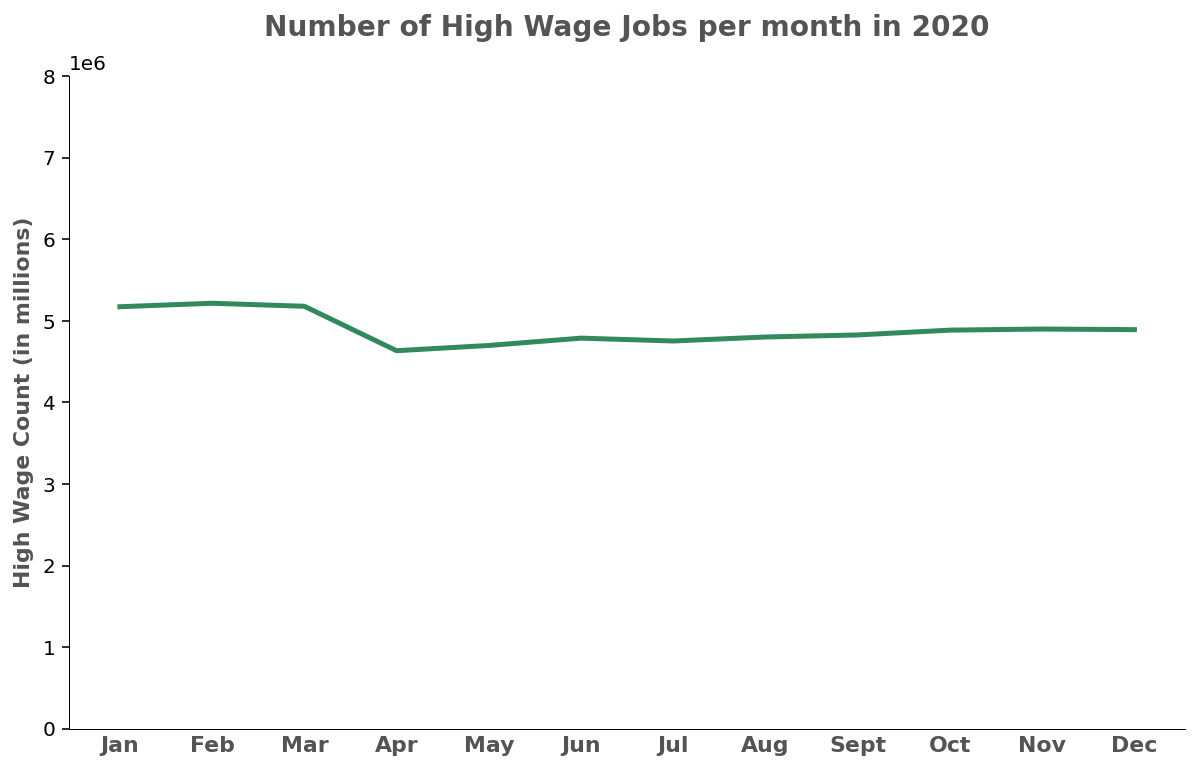

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per month in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count (in millions)', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,8e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

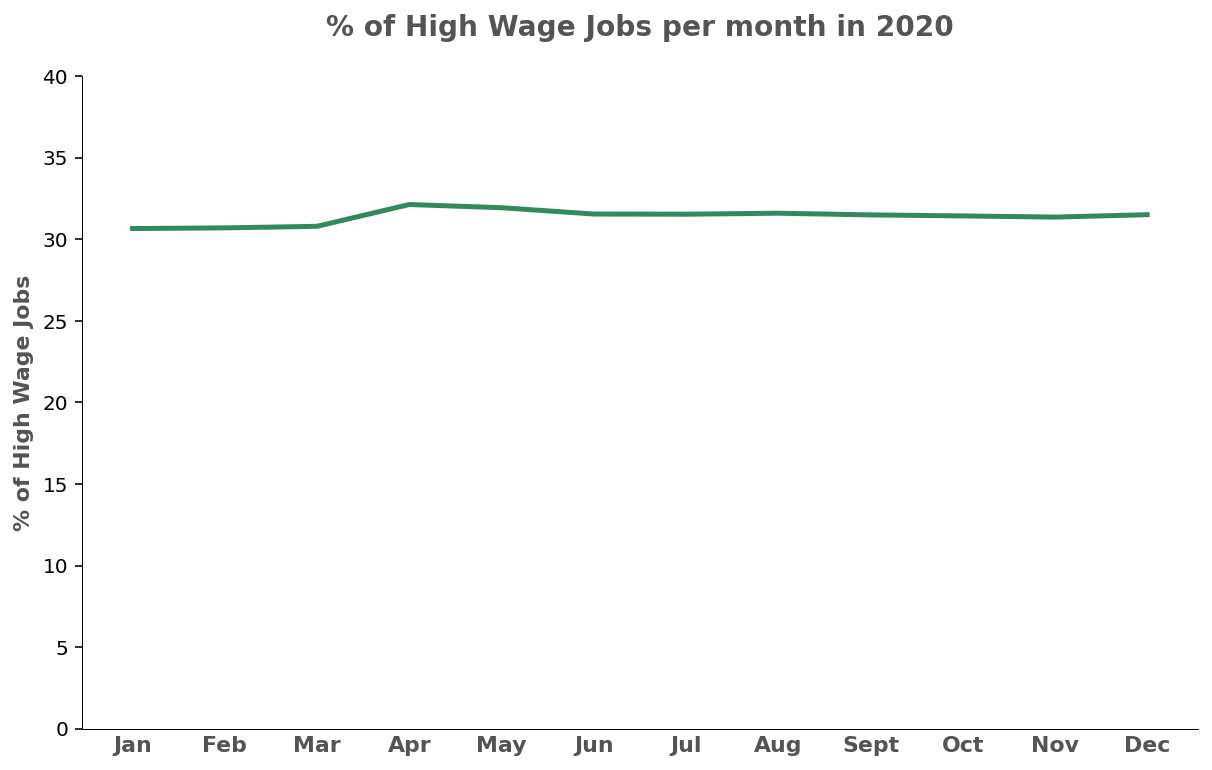

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'% of High Wage Jobs per month in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 40)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [26]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

High Wage Count  \
Industry                                                          
warehousing and storage                               36.000000   
mining and logging                                   388.704545   
personal and laundry services                       2499.833333   
repair and maintenance                              2790.166667   
total farm                                          3772.645833   
local government                                   47129.173611   
manufacturing                                      53144.062500   
educational and health services                    56733.916667   
health care and social assistance                  80730.645833   
professional scientific and technical services     88489.236111   

                                                Employment Count  \
Industry                                                           
warehousing and storage                              2158.333333   
mining and logging                                   1383.333333   
personal and laundry services                       39550.000000   
repair and maintenance                              33483.333333   
total farm                                          27667.361111   
local government                                   135536.111111   
manufacturing                                      111793.750000   
educational and health services                    164154.166667   
health care and social assistance                  290412.500000   
professional scientific and technical services     181461.111111   

                                                Cost of Living  
Industry                                                        
warehousing and storage                           77956.000000  
mining and logging                                70435.909091  
personal and laundry services                     80216.000000  
repair and maintenance                            80216.000000  
total farm                                        69410.250000  
local government                                  69410.250000  
manufacturing                                     69069.750000  
educational and health services                   68381.000000  
health care and social assistance                 71468.750000  
professional scientific and technical services    76846.666667

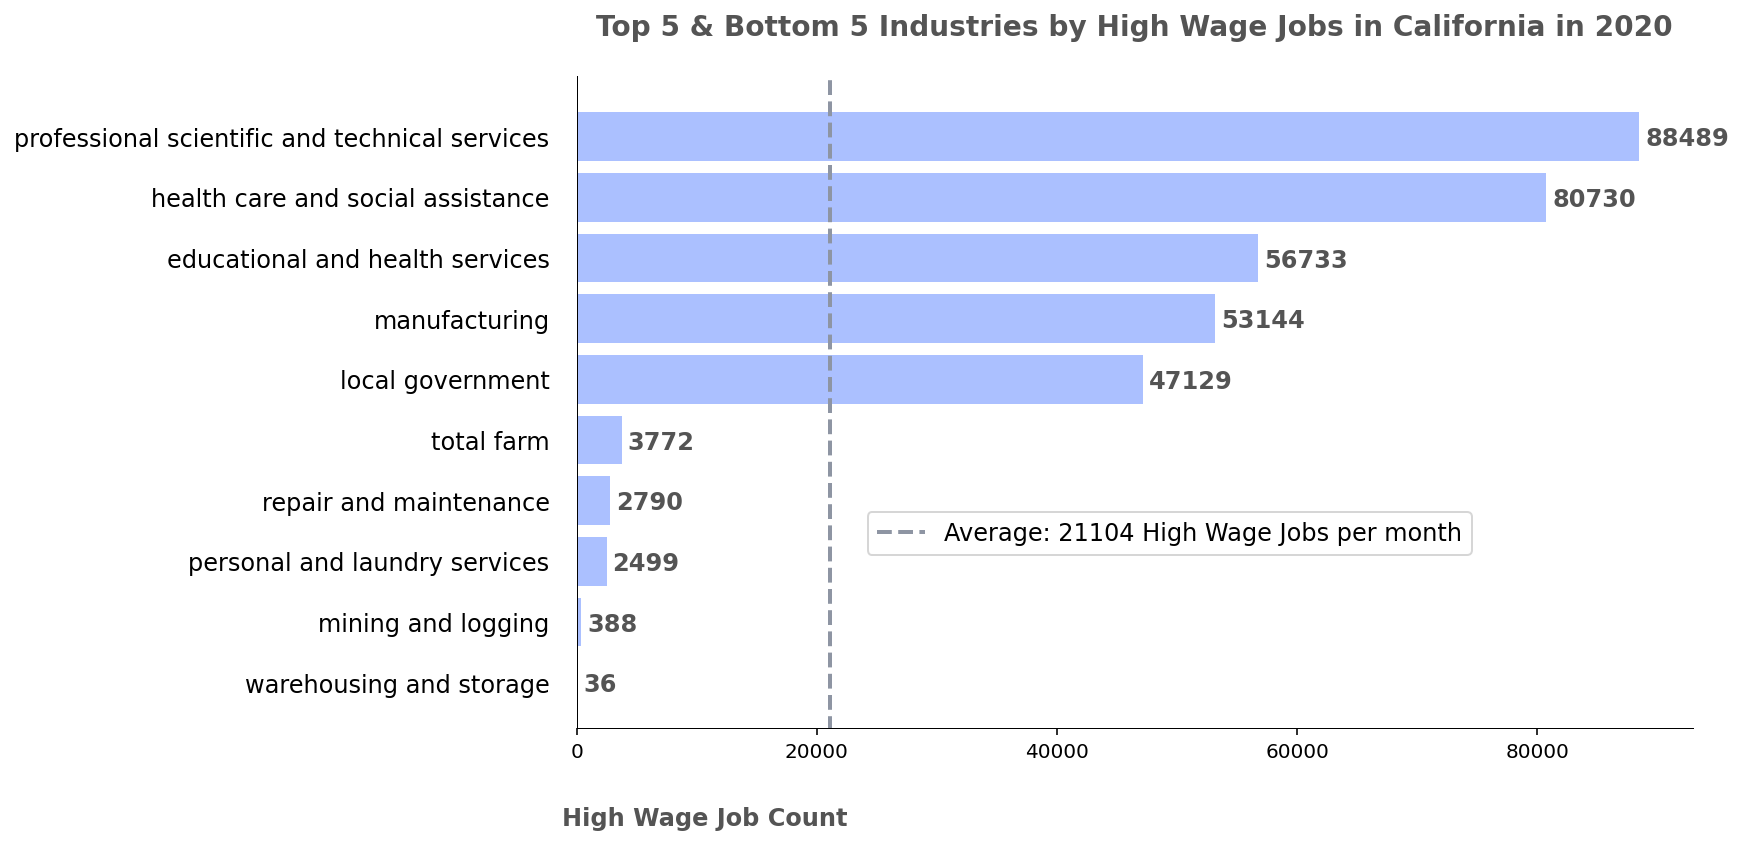

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title(f'Top 5 & Bottom 5 Industries by High Wage Jobs in California in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_state_industry_cut)):
    ax.annotate(f"{int(hw_state_industry_cut['High Wage Count'].values[i])}", 
            (int(hw_state_industry_cut['High Wage Count'].values[i])+500, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in specified year per region

In [28]:
hw_regions = data.groupby(by=["Region", "Date"]).sum().groupby(by=['Region']).mean().sort_values(by='High Wage Count')
hw_regions['Percentage'] = (hw_regions['High Wage Count'] / hw_regions['Employment Count']) * 100
hw_regions

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Redwood Coast            1.572767e+04      4.761667e+04        879195.0   
North State              4.693725e+04      1.426250e+05        871920.0   
Kern                     1.234341e+05      3.422750e+05       1261826.0   
Northern San Joaquin     1.788113e+05      5.354500e+05        982685.0   
Central San Joaquin      2.357586e+05      6.560500e+05       1008000.0   
Central Coast            2.360388e+05      7.246750e+05       1329400.0   
Inland Empire            4.084457e+05      1.492417e+06       1262980.0   
Sacramento               4.168432e+05      9.779583e+05        883358.0   
Orange                   4.376303e+05      1.526550e+06       2015904.0   
San Diego-Imperial       4.377584e+05      1.450100e+06       1637076.0   
Los Angeles              1.046788e+06      4.152692e+06       1925184.0   
Bay Area                 1.312106e+06      3.557792e+06       1750482.0   

                      Percentage  
Region                            
Redwood Coast          33.029751  
North State            32.909553  
Kern                   36.062839  
Northern San Joaquin   33.394590  
Central San Joaquin    35.936069  
Central Coast          32.571670  
Inland Empire          27.368072  
Sacramento             42.623825  
Orange                 28.667933  
San Diego-Imperial     30.188154  
Los Angeles            25.207448  
Bay Area               36.879797

In [29]:
hw_regions_perc_sorted = hw_regions.sort_values(by='Percentage')
hw_regions_perc_sorted

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Los Angeles              1.046788e+06      4.152692e+06       1925184.0   
Inland Empire            4.084457e+05      1.492417e+06       1262980.0   
Orange                   4.376303e+05      1.526550e+06       2015904.0   
San Diego-Imperial       4.377584e+05      1.450100e+06       1637076.0   
Central Coast            2.360388e+05      7.246750e+05       1329400.0   
North State              4.693725e+04      1.426250e+05        871920.0   
Redwood Coast            1.572767e+04      4.761667e+04        879195.0   
Northern San Joaquin     1.788113e+05      5.354500e+05        982685.0   
Central San Joaquin      2.357586e+05      6.560500e+05       1008000.0   
Kern                     1.234341e+05      3.422750e+05       1261826.0   
Bay Area                 1.312106e+06      3.557792e+06       1750482.0   
Sacramento               4.168432e+05      9.779583e+05        883358.0   

                      Percentage  
Region                            
Los Angeles            25.207448  
Inland Empire          27.368072  
Orange                 28.667933  
San Diego-Imperial     30.188154  
Central Coast          32.571670  
North State            32.909553  
Redwood Coast          33.029751  
Northern San Joaquin   33.394590  
Central San Joaquin    35.936069  
Kern                   36.062839  
Bay Area               36.879797  
Sacramento             42.623825

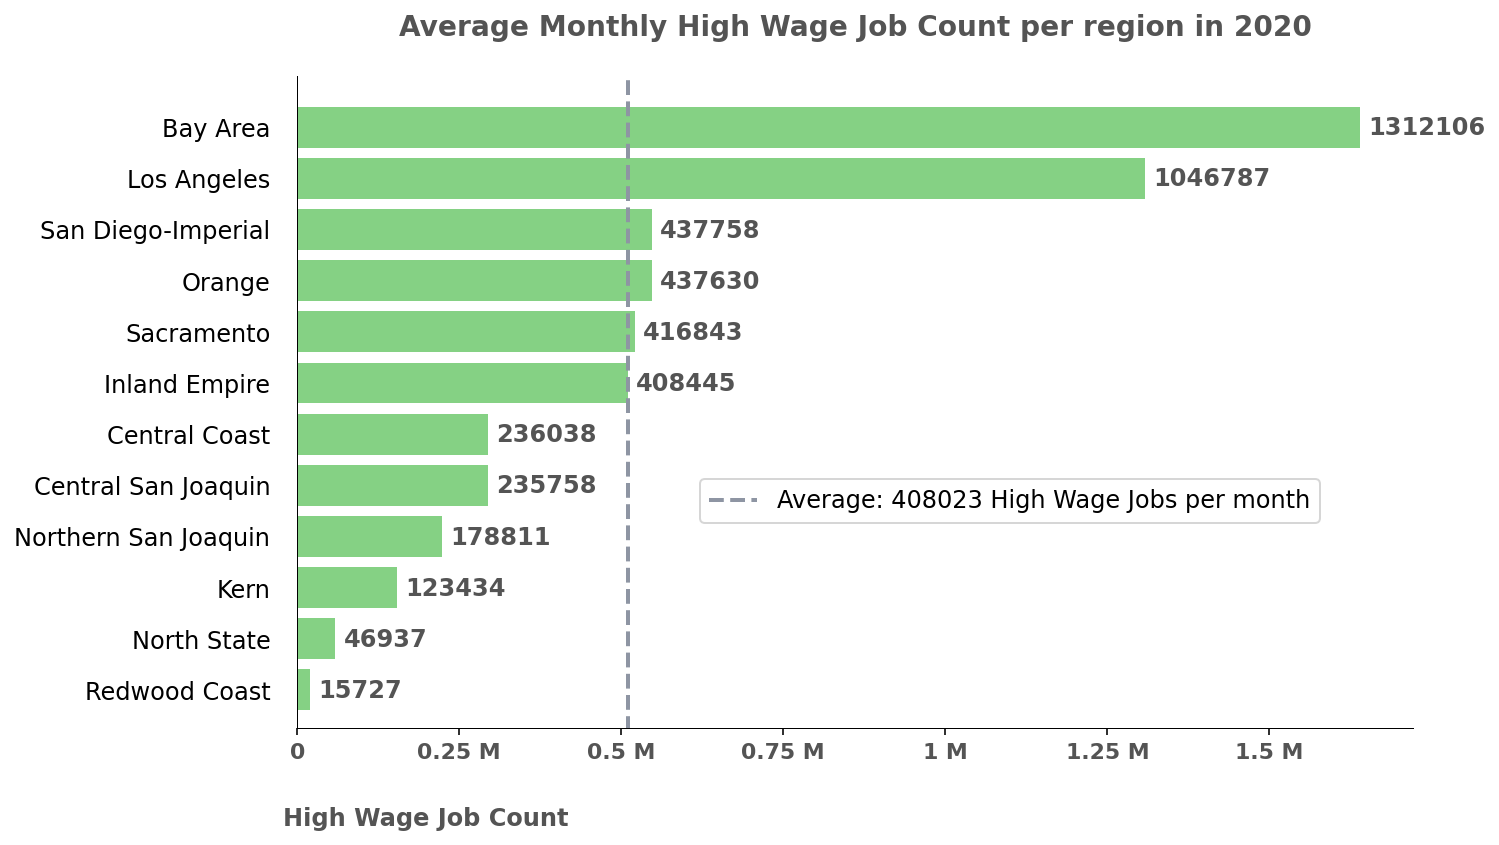

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Monthly High Wage Job Count per region in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_regions)):
    ax.annotate(f"{int(hw_regions['High Wage Count'].values[i])}", 
            (int(hw_regions['High Wage Count'].values[i])+10000, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.35, 0.4), loc='upper left', fontsize=12)
plt.show()

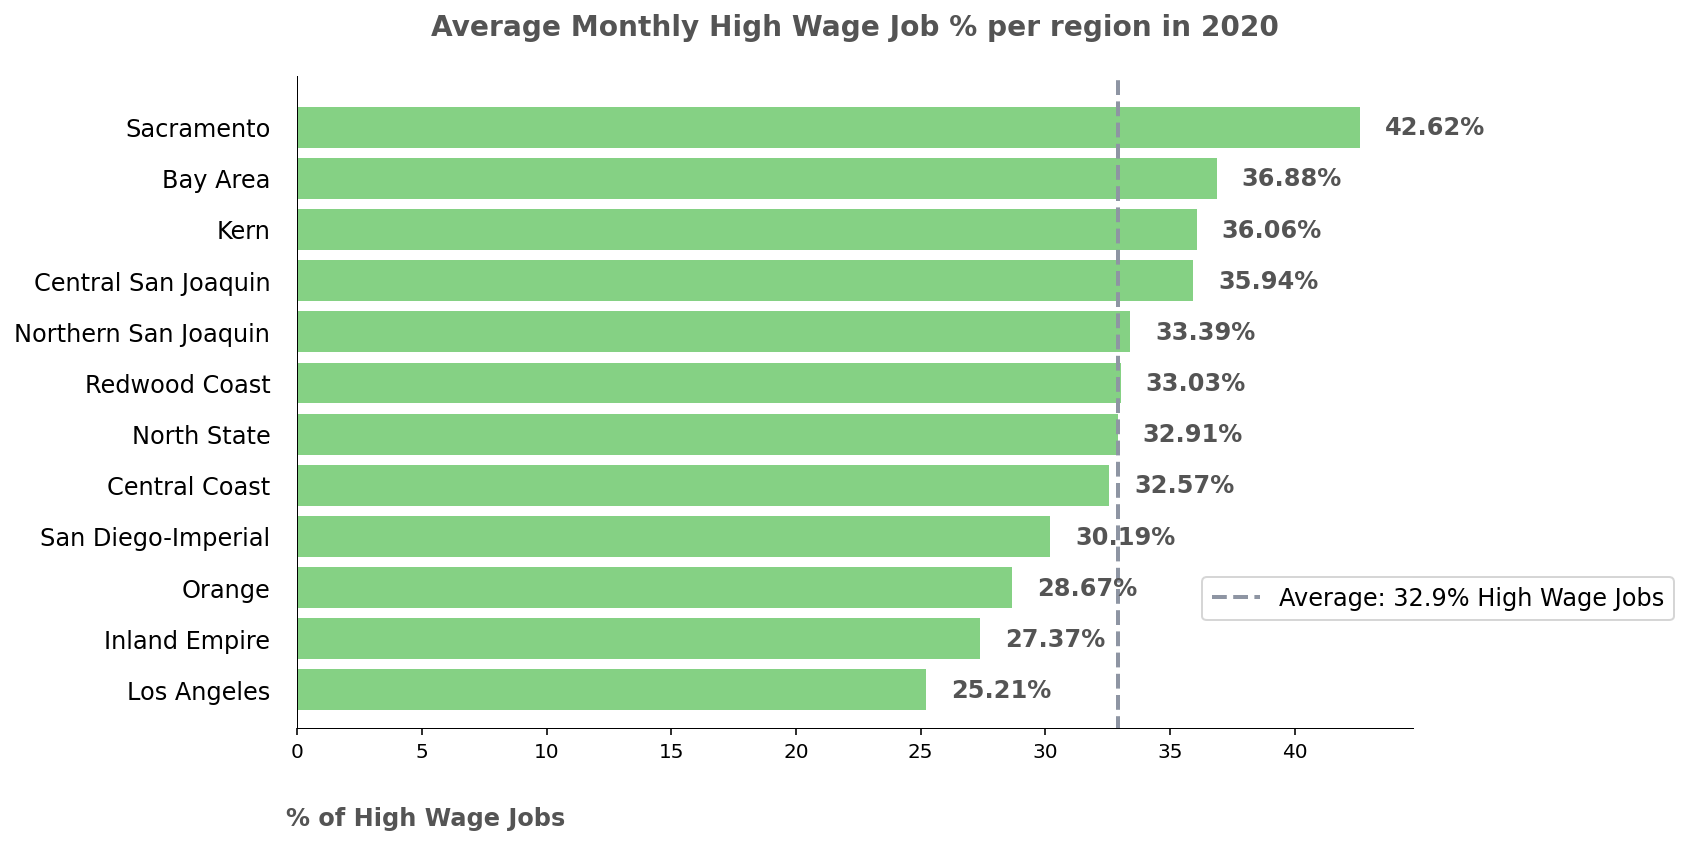

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), hw_regions_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(hw_regions_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(hw_regions_perc_sorted['Percentage'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Monthly High Wage Job % per region in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_regions_perc_sorted)):
    ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[i], 2)}%", 
            (hw_regions_perc_sorted['Percentage'].values[i]+1, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.8, 0.25), loc='upper left', fontsize=12)
plt.show()

In [32]:
kern_data = data.loc[data['Region'] == 'Kern']
csj_data = data.loc[data['Region'] == 'Central San Joaquin']
nsj_data = data.loc[data['Region'] == 'Northern San Joaquin']
ns_data = data.loc[data['Region'] == 'North State']
rc_data = data.loc[data['Region'] == 'Redwood Coast']
sd_data = data.loc[data['Region'] == 'San Diego-Imperial']
orange_data = data.loc[data['Region'] == 'Orange']
ie_data = data.loc[data['Region'] == 'Inland Empire']
cc_data = data.loc[data['Region'] == 'Central Coast']
bay_data = data.loc[data['Region'] == 'Bay Area']
sac_data = data.loc[data['Region'] == 'Sacramento']
la_data = data.loc[data['Region'] == 'Los Angeles']

In [33]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

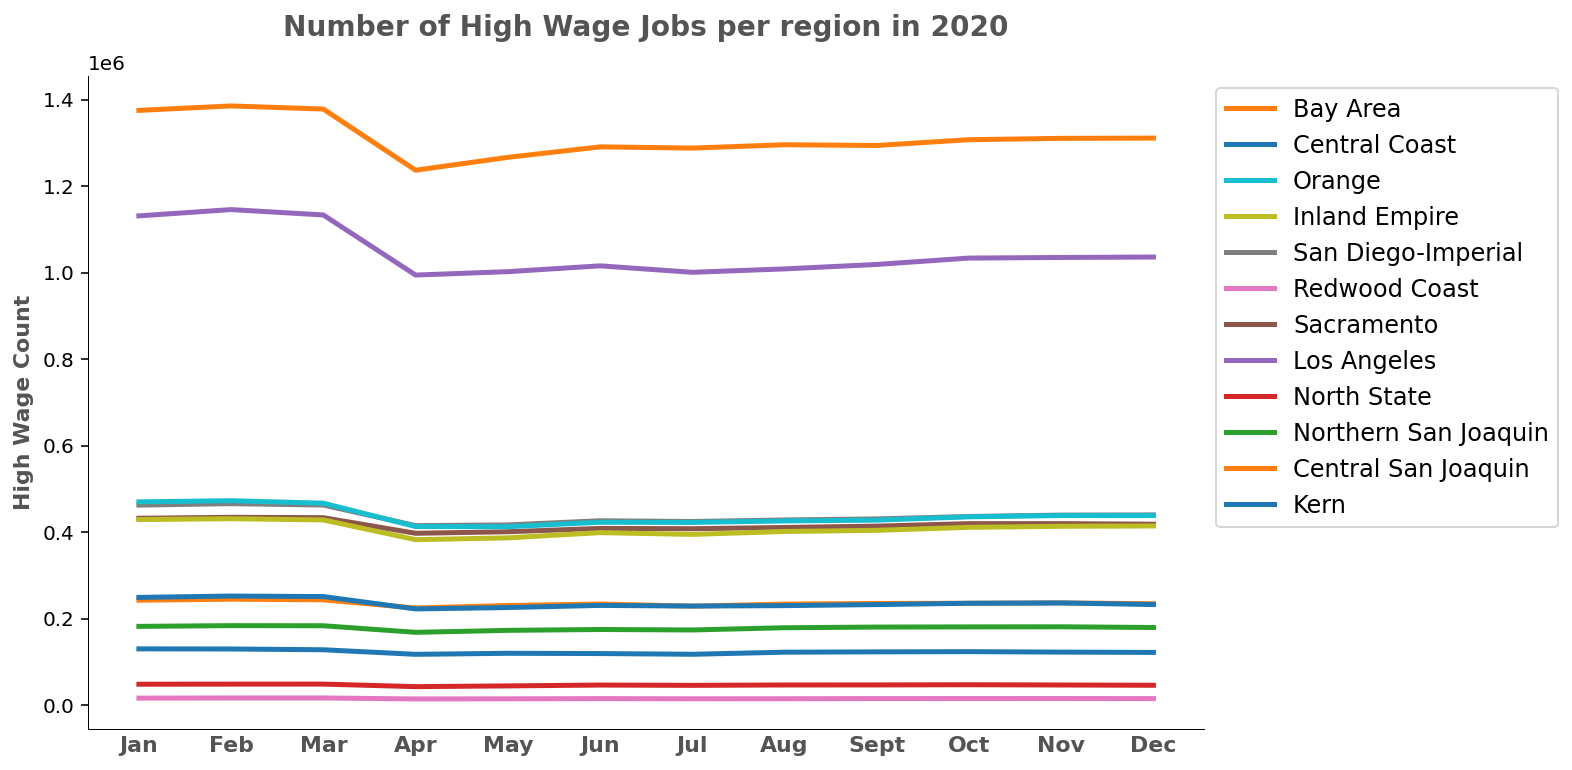

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per region in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

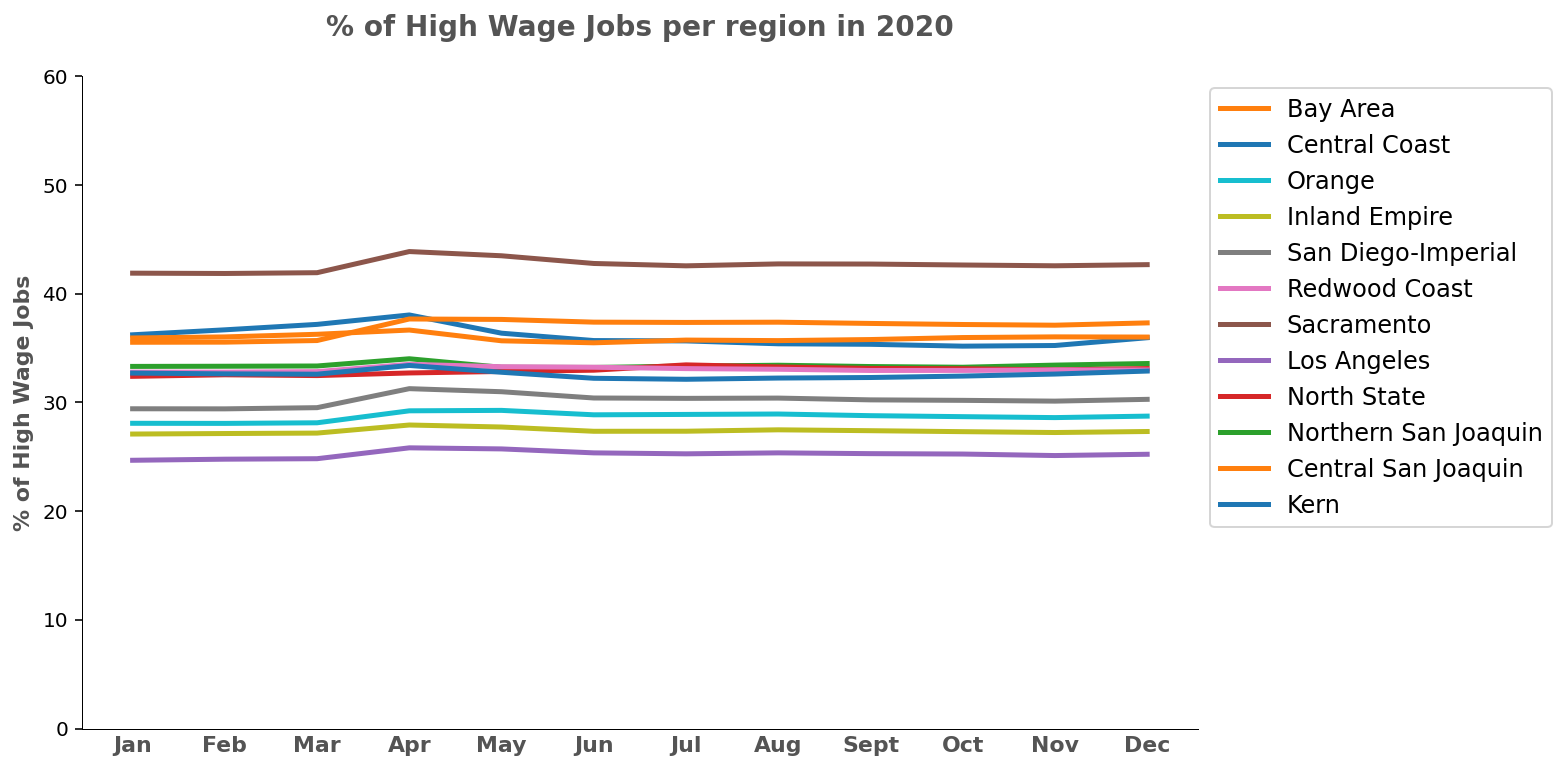

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'% of High Wage Jobs per region in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 60)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### High Wage Jobs per 100,000 People

In [36]:
region_pop = county_info.groupby(by=['CERF Regions']).sum()[['Population']].reset_index()

In [38]:
percapita = data.copy()

In [43]:
percapita = percapita.groupby(by=['Region', 'Date']).sum()[['High Wage Count', 'Employment Count']].reset_index()

In [45]:
percapita = pd.merge(percapita, region_pop, left_on='Region', right_on='CERF Regions')

In [49]:
percapita['Per 100k'] = (percapita['High Wage Count'] / percapita['Population']) * 100000

In [50]:
percapita.head()

Region        Date  High Wage Count  Employment Count CERF Regions  \
0  Bay Area  2020-01-01          1375630         3871300.0     Bay Area   
1  Bay Area  2020-02-01          1385919         3898900.0     Bay Area   
2  Bay Area  2020-03-01          1378703         3862600.0     Bay Area   
3  Bay Area  2020-04-01          1237303         3284000.0     Bay Area   
4  Bay Area  2020-05-01          1267004         3366500.0     Bay Area   

   Population      Per 100k  
0     7710026  17842.092880  
1     7710026  17975.542495  
2     7710026  17881.950074  
3     7710026  16047.974417  
4     7710026  16433.200096

In [51]:
kern_percapita = percapita.loc[percapita['Region'] == 'Kern']
csj_percapita = percapita.loc[percapita['Region'] == 'Central San Joaquin']
nsj_percapita = percapita.loc[percapita['Region'] == 'Northern San Joaquin']
ns_percapita = percapita.loc[percapita['Region'] == 'North State']
rc_percapita = percapita.loc[percapita['Region'] == 'Redwood Coast']
sd_percapita = percapita.loc[percapita['Region'] == 'San Diego-Imperial']
orange_percapita = percapita.loc[percapita['Region'] == 'Orange']
ie_percapita = percapita.loc[percapita['Region'] == 'Inland Empire']
cc_percapita = percapita.loc[percapita['Region'] == 'Central Coast']
bay_percapita = percapita.loc[percapita['Region'] == 'Bay Area']
sac_percapita = percapita.loc[percapita['Region'] == 'Sacramento']
la_percapita = percapita.loc[percapita['Region'] == 'Los Angeles']

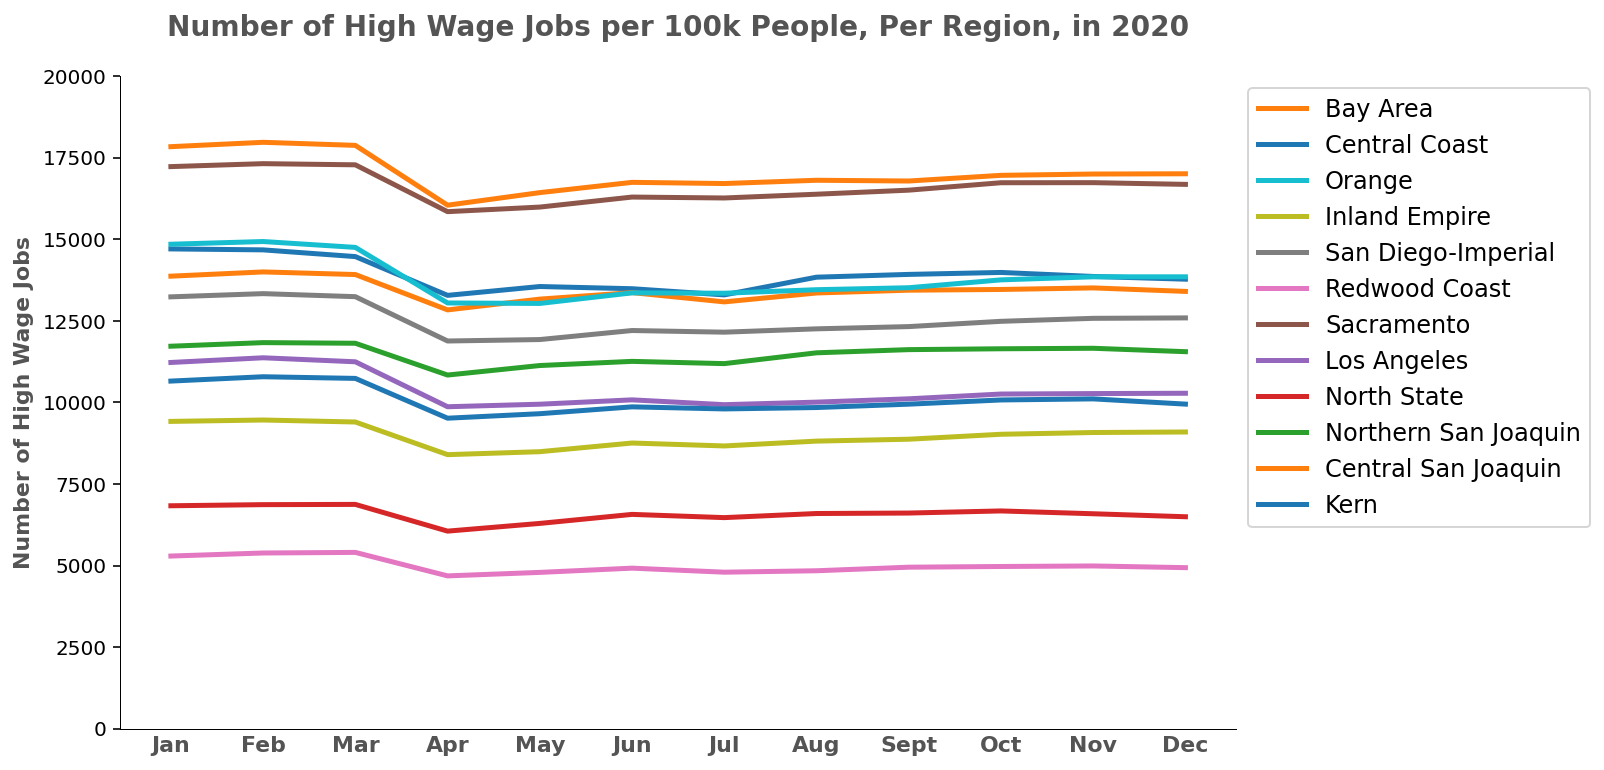

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(kern_percapita['Per 100k'].values, lw=2.5, label='Kern')
ax.plot(csj_percapita['Per 100k'].values, lw=2.5, label='Central San Joaquin')
ax.plot(nsj_percapita['Per 100k'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(ns_percapita['Per 100k'].values, lw=2.5, label='North State')
ax.plot(la_percapita['Per 100k'].values, lw=2.5, label='Los Angeles')
ax.plot(sac_percapita['Per 100k'].values, lw=2.5, label='Sacramento')
ax.plot(rc_percapita['Per 100k'].values, lw=2.5, label='Redwood Coast')
ax.plot(sd_percapita['Per 100k'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(ie_percapita['Per 100k'].values, lw=2.5, label='Inland Empire')
ax.plot(orange_percapita['Per 100k'].values, lw=2.5, label='Orange')
ax.plot(cc_percapita['Per 100k'].values, lw=2.5, label='Central Coast')
ax.plot(bay_percapita['Per 100k'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Number of High Wage Jobs per 100k People, Per Region, in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Number of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 20000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

In [58]:
percapita_mean = percapita.groupby(by='Region').mean().sort_values('Per 100k')

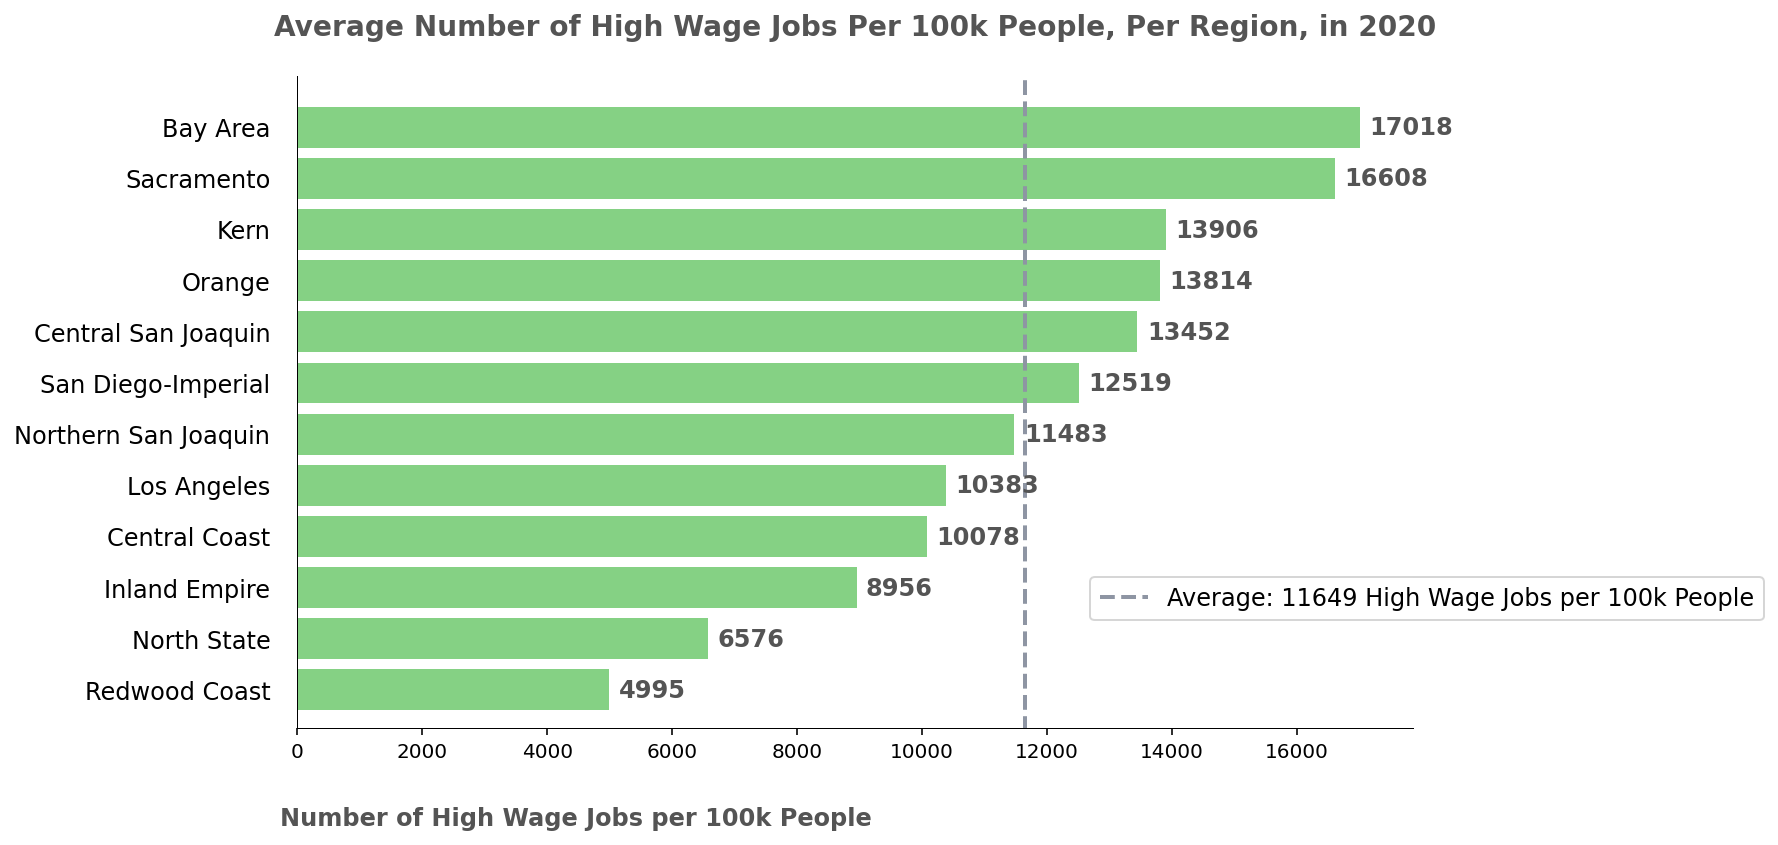

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), percapita_mean['Per 100k'].values, color='#85d184')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(percapita_mean.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of High Wage Jobs per 100k People", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.25, -0.12)

mean_val = round(percapita_mean['Per 100k'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per 100k People')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Number of High Wage Jobs Per 100k People, Per Region, in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(percapita_mean)):
    ax.annotate(f"{round(percapita_mean['Per 100k'].values[i])}", 
            (round(percapita_mean['Per 100k'].values[i])+150, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.7, 0.25), loc='upper left', fontsize=12)
plt.show()

### Tree Plot

In [36]:
hw_regions = hw_regions.sort_values('High Wage Count', ascending=False)
hw_regions

High Wage Count  Employment Count  Cost of Living  \
Region                                                                    
Bay Area                 1.312106e+06      3.557792e+06       1750482.0   
Los Angeles              1.046788e+06      4.152692e+06       1925184.0   
San Diego-Imperial       4.377584e+05      1.450100e+06       1637076.0   
Orange                   4.376303e+05      1.526550e+06       2015904.0   
Sacramento               4.168432e+05      9.779583e+05        883358.0   
Inland Empire            4.084457e+05      1.492417e+06       1262980.0   
Central Coast            2.360388e+05      7.246750e+05       1329400.0   
Central San Joaquin      2.357586e+05      6.560500e+05       1008000.0   
Northern San Joaquin     1.788113e+05      5.354500e+05        982685.0   
Kern                     1.234341e+05      3.422750e+05       1261826.0   
North State              4.693725e+04      1.426250e+05        871920.0   
Redwood Coast            1.572767e+04      4.761667e+04        879195.0   

                      Percentage  
Region                            
Bay Area               36.879797  
Los Angeles            25.207448  
San Diego-Imperial     30.188154  
Orange                 28.667933  
Sacramento             42.623825  
Inland Empire          27.368072  
Central Coast          32.571670  
Central San Joaquin    35.936069  
Northern San Joaquin   33.394590  
Kern                   36.062839  
North State            32.909553  
Redwood Coast          33.029751

In [37]:
dates = sorted(data['Date'].unique())

In [38]:
data_dec = data.loc[data['Date'] == dates[-1]]
data_dec['Percentage'] = (data_dec['High Wage Count'] / data_dec['Employment Count']) * 100
data_dec.head()

Industry        Date         Region  \
11                accommodation and food services  2020-12-01  Inland Empire   
23  administrative and support and waste services  2020-12-01  Inland Empire   
35              arts entertainment and recreation  2020-12-01  Inland Empire   
47                                   construction  2020-12-01  Inland Empire   
59                                  durable goods  2020-12-01  Inland Empire   

    High Wage Count  Employment Count  Cost of Living  Percentage  
11            13694          115300.0           63149   11.876843  
23            25917          106500.0           63149   24.335211  
35             2305           11600.0           63149   19.870690  
47            38777          109500.0           63149   35.412785  
59            18549           56800.0           63149   32.656690

In [39]:
fig = px.treemap(data_dec, 
                 path=[px.Constant('California'), 'Region'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

### Job Creation Numbers

In [40]:
data.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  
0            18315          154200.0           63149  
1            18623          156800.0           63149  
2            18279          153900.0           63149  
3            11354           95600.0           63149  
4            12174          102500.0           63149

In [41]:
data_jobcreation = data.groupby(by=['Region', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != dates[0]]
data_jobcreation.head()

Region        Date  High Wage Count  Job Creation
1  Bay Area  2020-02-01          1385919       10289.0
2  Bay Area  2020-03-01          1378703       -7216.0
3  Bay Area  2020-04-01          1237303     -141400.0
4  Bay Area  2020-05-01          1267004       29701.0
5  Bay Area  2020-06-01          1291278       24274.0

In [42]:
state_jc = data_jobcreation.groupby(by=['Date']).sum()

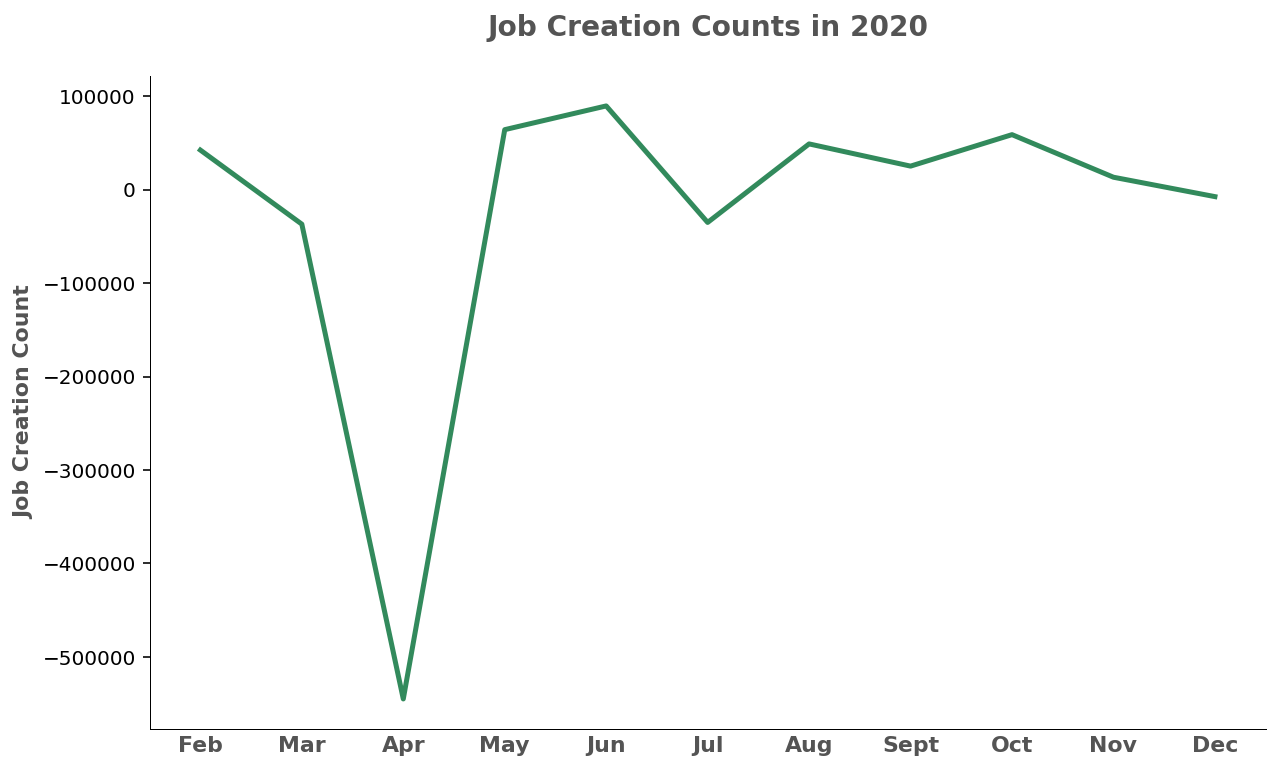

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(state_jc['Job Creation'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Job Creation Counts in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 11, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [46]:
regions_jc = data_jobcreation.groupby(by=['Region']).mean().sort_values('Job Creation')

In [47]:
regions_jc

High Wage Count  Job Creation
Region                                             
Los Angeles              1.039067e+06  -8652.272727
Bay Area                 1.306331e+06  -5825.909091
Orange                   4.346445e+05  -2877.090909
San Diego-Imperial       4.354743e+05  -2052.090909
Central Coast            2.348114e+05  -1503.818182
Inland Empire            4.065279e+05  -1346.454545
Sacramento               4.154220e+05  -1243.181818
Kern                     1.227877e+05   -748.636364
Central San Joaquin      2.350905e+05   -744.363636
Northern San Joaquin     1.784705e+05   -237.000000
North State              4.677109e+04   -218.454545
Redwood Coast            1.564318e+04   -101.818182

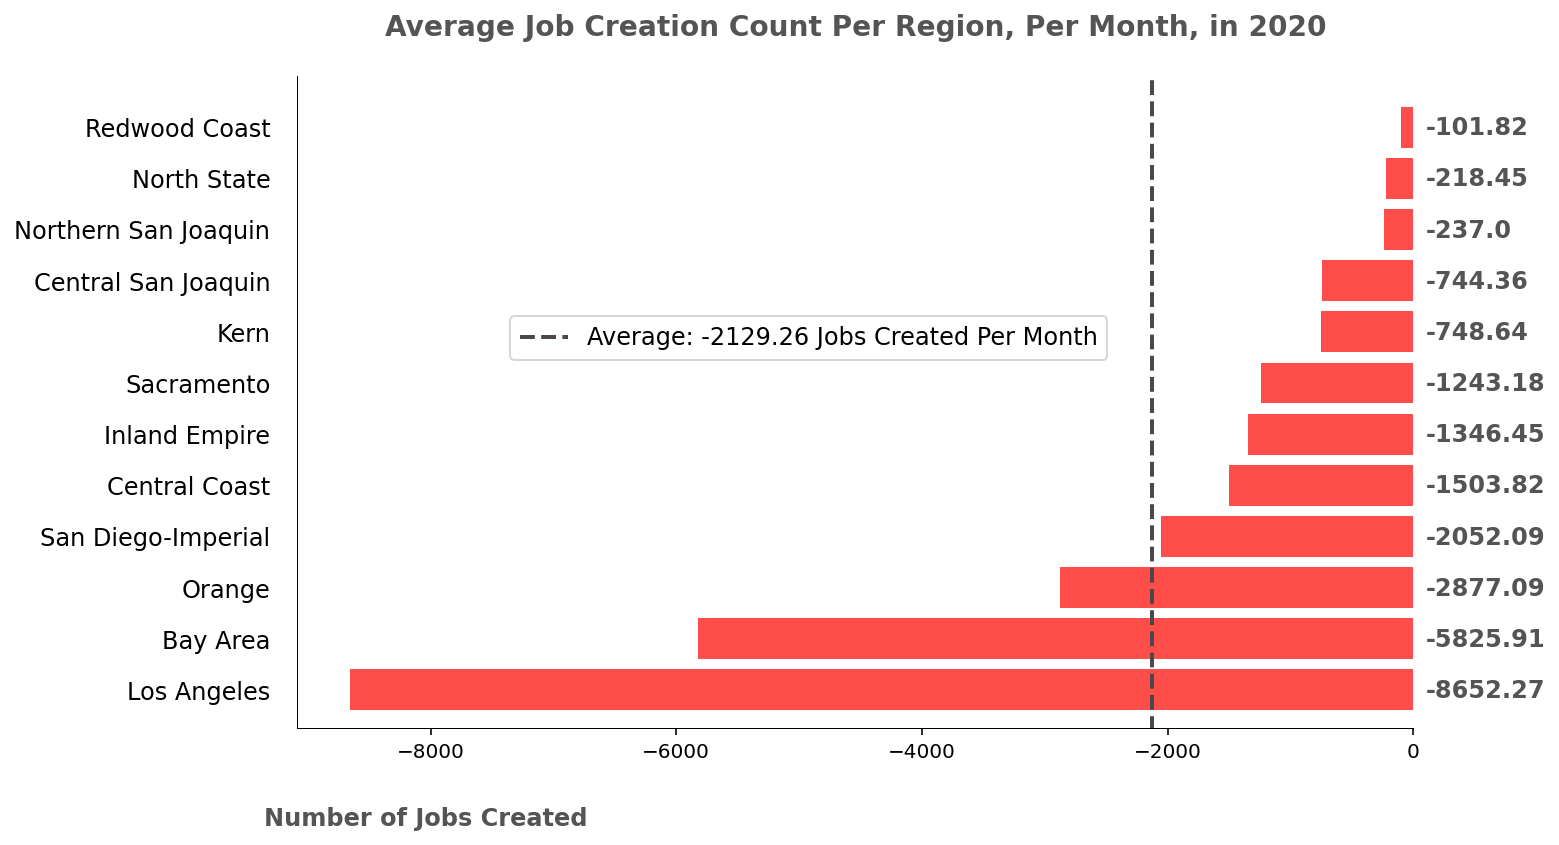

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(12), regions_jc['Job Creation'].values, color='#ff4d4a')

ax.set_yticks(np.arange(12))
ax.set_yticklabels(regions_jc.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of Jobs Created", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(regions_jc['Job Creation'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=12, 
          color='#4d4747', lw=2, ls='dashed', label=f'Average: {mean_val} Jobs Created Per Month')
ax.set_ylim(-0.75, 12)

ax.set_title(f'Average Job Creation Count Per Region, Per Month, in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(regions_jc)):
    ax.annotate(f"{round(regions_jc['Job Creation'].values[i], 2)}", 
            (100, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.18, 0.65), loc='upper left', fontsize=12)
plt.show()

In [49]:
kern_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Kern']
csj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central San Joaquin']
nsj_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Northern San Joaquin']
ns_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'North State']
rc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['Region'] == 'Los Angeles']

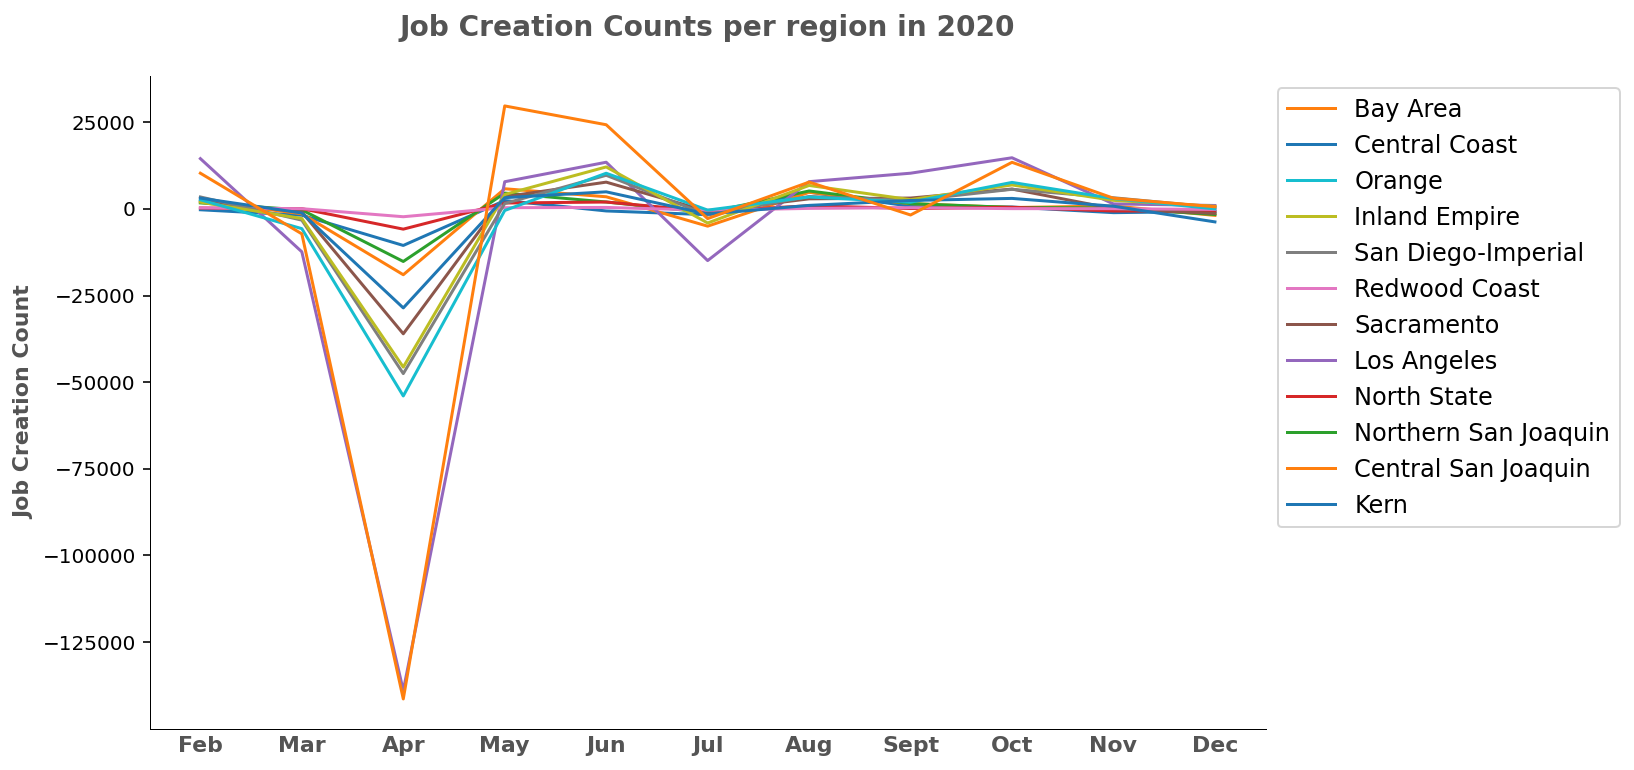

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(kern_jc['Job Creation'].values, label='Kern')
ax.plot(csj_jc['Job Creation'].values, label='Central San Joaquin')
ax.plot(nsj_jc['Job Creation'].values, label='Northern San Joaquin')
ax.plot(ns_jc['Job Creation'].values, label='North State')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title(f'Job Creation Counts per region in {year}', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 11, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Racial demographics breakdown

In [51]:
data_demo = pd.read_csv(f'data/outputs/hw_outputs_w_race_{year}.csv')

In [52]:
data_demo.head()

Industry        Date         Region  \
0  accommodation and food services  2020-01-01  Inland Empire   
1  accommodation and food services  2020-02-01  Inland Empire   
2  accommodation and food services  2020-03-01  Inland Empire   
3  accommodation and food services  2020-04-01  Inland Empire   
4  accommodation and food services  2020-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living Output Race  
0            28069          154200.0           63149       White  
1            28542          156800.0           63149       White  
2            28014          153900.0           63149       White  
3            17402           95600.0           63149       White  
4            18658          102500.0           63149       White

In [53]:
hw_race = data_demo.groupby(by=["Output Race", "Date"]).sum().groupby(by=['Output Race']).mean()
hw_race['Percentage'] = (hw_race['High Wage Count'] / hw_race['Employment Count']) * 100
hw_race = hw_race.sort_values(by='Percentage')

In [54]:
hw_race

High Wage Count  Employment Count  \
Output Race                                                        
Latino                            2.772040e+06      1.542838e+07   
American Indian/Alaska Native     1.828782e+06      8.786350e+06   
Black                             3.414721e+06      1.377165e+07   
Some other race                   3.554346e+06      1.059862e+07   
Multiracial                       5.043489e+06      1.466588e+07   
Asian                             5.337901e+06      1.486892e+07   
White                             6.593130e+06      1.554639e+07   

                               Cost of Living  Percentage  
Output Race                                                
Latino                             15236351.0   17.967144  
American Indian/Alaska Native       8096635.0   20.813898  
Black                              12884901.0   24.795292  
Some other race                     8933531.0   33.535944  
Multiracial                        14096338.0   34.389262  
Asian                              14105128.0   35.899728  
White                              15744861.0   42.409393

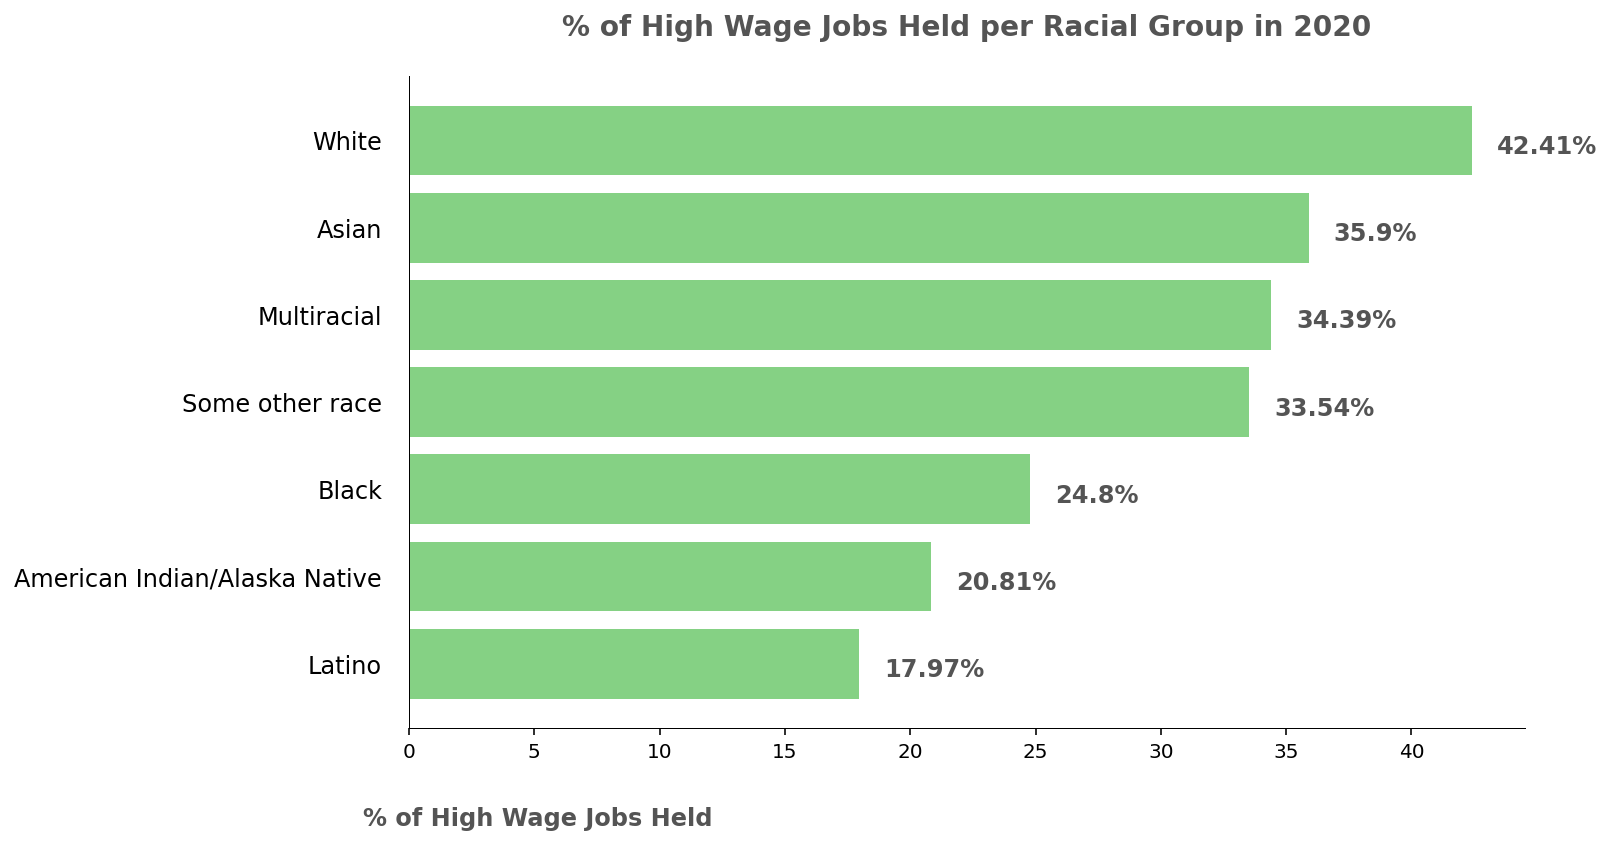

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs Held", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.set_title(f'% of High Wage Jobs Held per Racial Group in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_race)):
    ax.annotate(f"{round(hw_race['Percentage'].values[i], 2)}%", 
            (hw_race['Percentage'].values[i]+1, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [56]:
hw_race = hw_race.sort_values(by=['High Wage Count'])

In [57]:
hw_race

High Wage Count  Employment Count  \
Output Race                                                        
American Indian/Alaska Native     1.828782e+06      8.786350e+06   
Latino                            2.772040e+06      1.542838e+07   
Black                             3.414721e+06      1.377165e+07   
Some other race                   3.554346e+06      1.059862e+07   
Multiracial                       5.043489e+06      1.466588e+07   
Asian                             5.337901e+06      1.486892e+07   
White                             6.593130e+06      1.554639e+07   

                               Cost of Living  Percentage  
Output Race                                                
American Indian/Alaska Native       8096635.0   20.813898  
Latino                             15236351.0   17.967144  
Black                              12884901.0   24.795292  
Some other race                     8933531.0   33.535944  
Multiracial                        14096338.0   34.389262  
Asian                              14105128.0   35.899728  
White                              15744861.0   42.409393

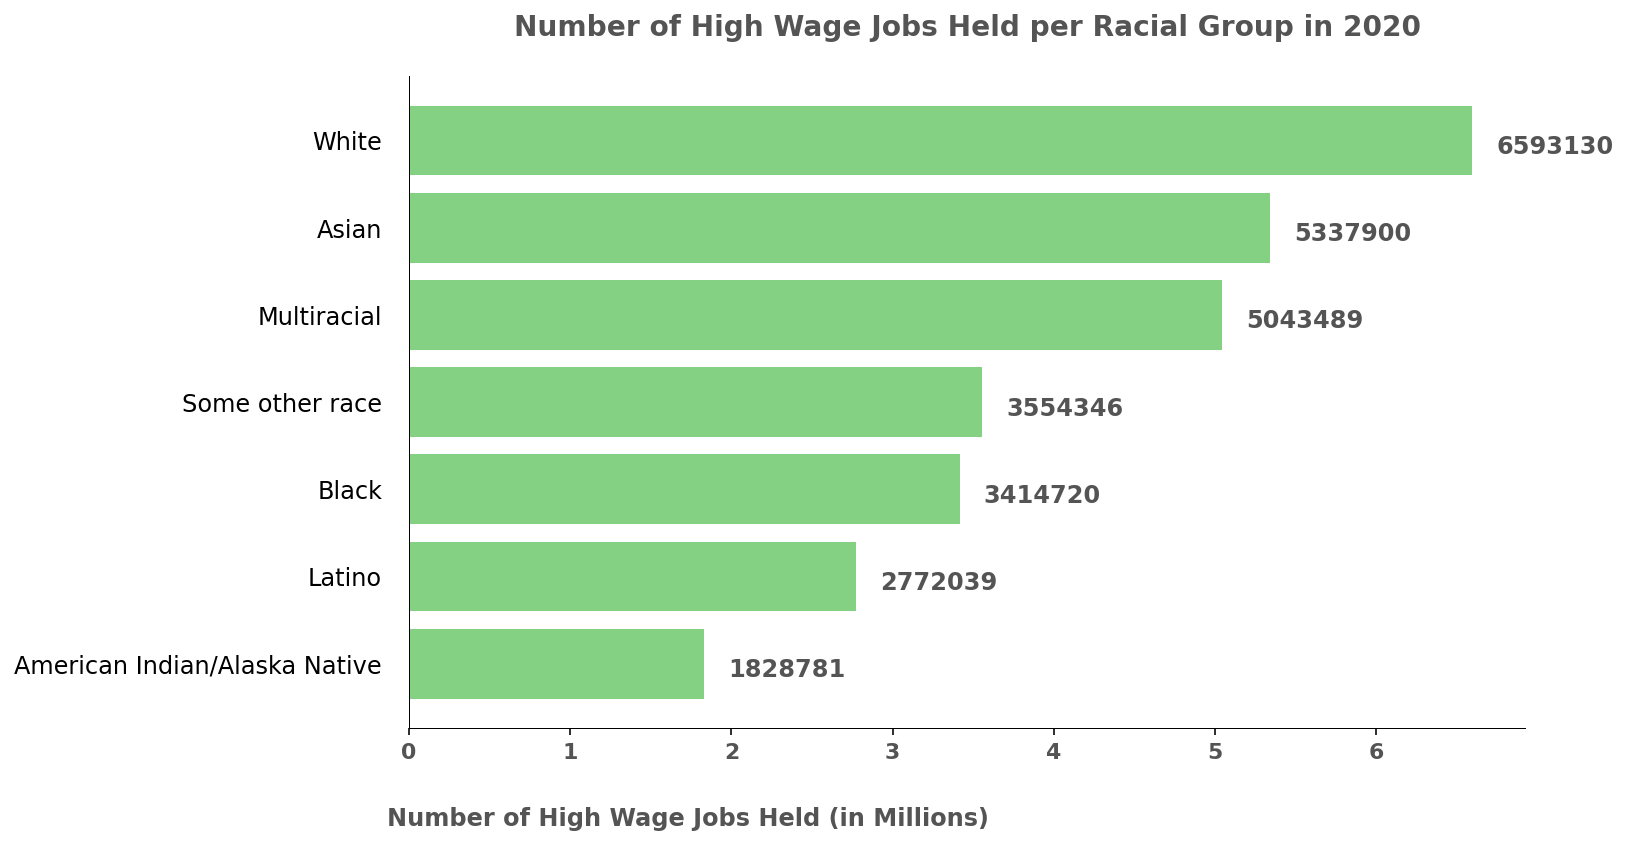

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(7), hw_race['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(7))
ax.set_yticklabels(hw_race.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("Number of High Wage Jobs Held (in Millions)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.25, -0.12)
ax.set_xticklabels(['0', '1','2','3','4','5','6', '7'], 
                   fontsize=11, weight='bold', color = '#545454')

ax.set_title(f'Number of High Wage Jobs Held per Racial Group in {year}', 
             fontsize=14, weight='bold', pad=20, color='#545454')

for i in range(len(hw_race)):
    ax.annotate(f"{int(hw_race['High Wage Count'].values[i])}", 
            (int(hw_race['High Wage Count'].values[i])+150000, -0.15+i), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [59]:
fig = px.treemap(hw_race, 
                 path=[px.Constant('Total'), hw_race.index], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Multiyear Visualizations

In [60]:
hw_2014 = pd.read_csv('data/outputs/hw_outputs_2014.csv')
hw_2015 = pd.read_csv('data/outputs/hw_outputs_2015.csv')
hw_2016 = pd.read_csv('data/outputs/hw_outputs_2016.csv')
hw_2017 = pd.read_csv('data/outputs/hw_outputs_2017.csv')
hw_2018 = pd.read_csv('data/outputs/hw_outputs_2018.csv')
hw_2019 = pd.read_csv('data/outputs/hw_outputs_2019.csv')
hw_2020 = pd.read_csv('data/outputs/hw_outputs_2020.csv')

In [61]:
hw_multiyear = pd.concat([hw_2014, hw_2015, hw_2016, hw_2017, hw_2018, hw_2019, hw_2020])

In [62]:
hw_multiyear.head()

Industry        Date         Region  \
0  accommodation and food services  2014-01-01  Inland Empire   
1  accommodation and food services  2014-02-01  Inland Empire   
2  accommodation and food services  2014-03-01  Inland Empire   
3  accommodation and food services  2014-04-01  Inland Empire   
4  accommodation and food services  2014-05-01  Inland Empire   

   High Wage Count  Employment Count  Cost of Living  
0            12184          123200.0           59469  
1            12352          124900.0           59469  
2            12490          126300.0           59469  
3            12550          126900.0           59469  
4            12659          128000.0           59469

In [63]:
hw_state = hw_multiyear.groupby(by=["Date"]).sum()
hw_state['Percentage'] = (hw_state['High Wage Count'] / hw_state['Employment Count']) * 100

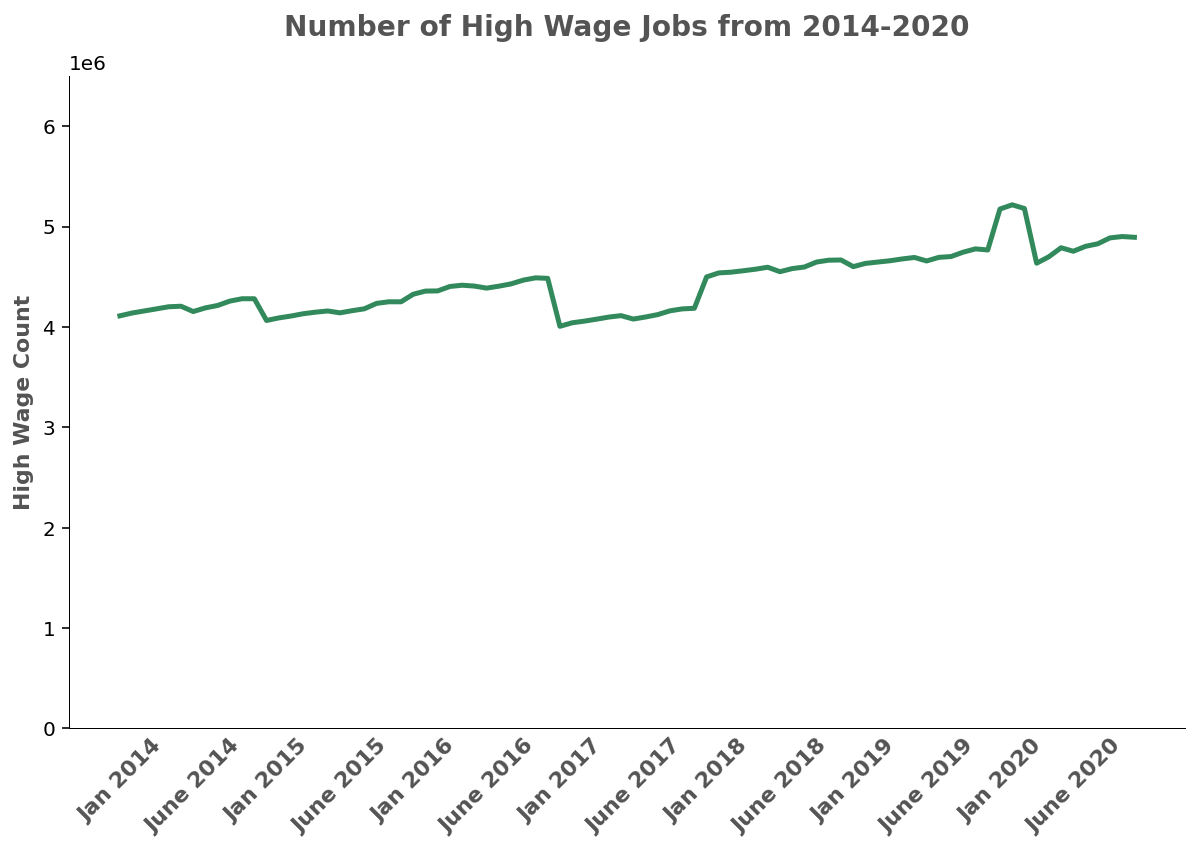

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,6.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

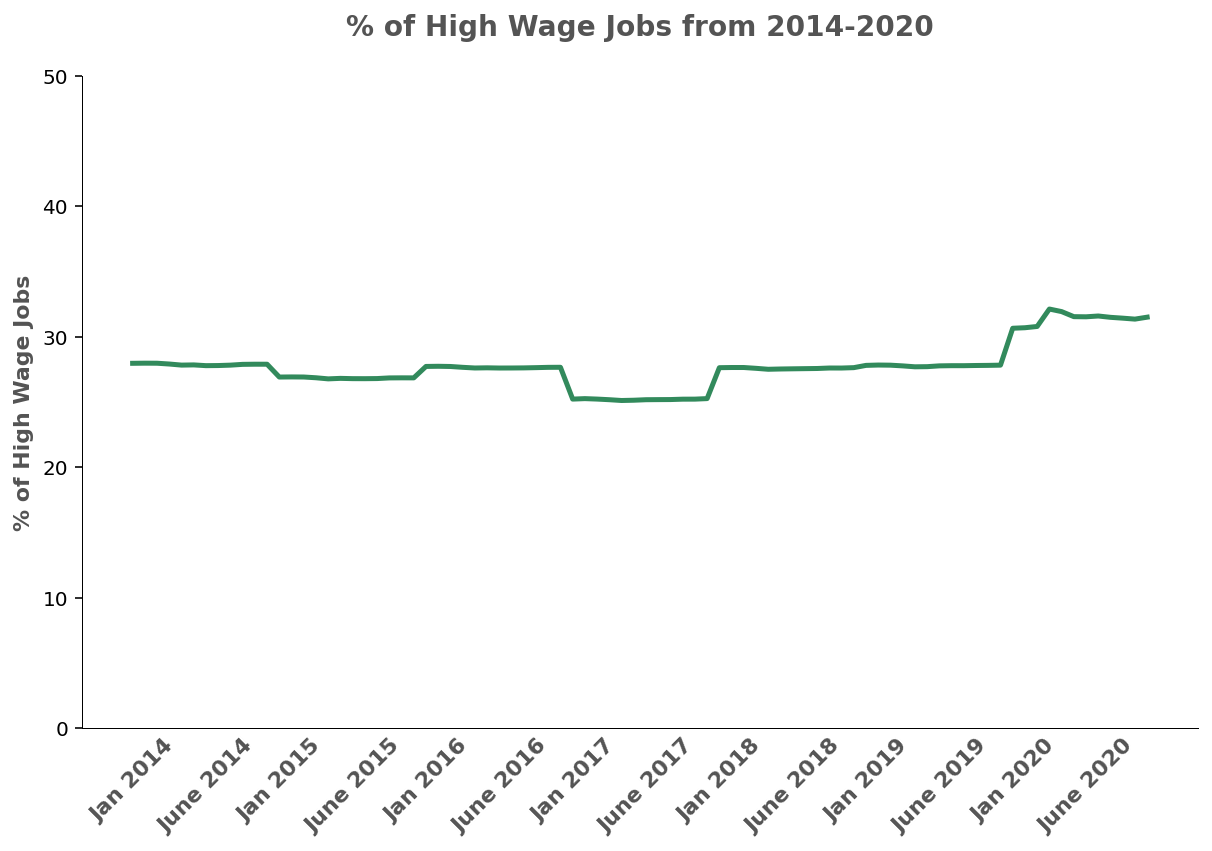

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0,50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

In [66]:
kern_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Kern']
csj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central San Joaquin']
nsj_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Northern San Joaquin']
ns_data = hw_multiyear.loc[hw_multiyear['Region'] == 'North State']
rc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Redwood Coast']
sd_data = hw_multiyear.loc[hw_multiyear['Region'] == 'San Diego-Imperial']
orange_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Orange']
ie_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Inland Empire']
cc_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Central Coast']
bay_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Bay Area']
sac_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Sacramento']
la_data = hw_multiyear.loc[hw_multiyear['Region'] == 'Los Angeles']

In [67]:
hw_kern = kern_data.groupby(by=["Date"]).sum()
hw_kern['Percentage'] = (hw_kern['High Wage Count'] / hw_kern['Employment Count']) * 100
hw_csj = csj_data.groupby(by=["Date"]).sum()
hw_csj['Percentage'] = (hw_csj['High Wage Count'] / hw_csj['Employment Count']) * 100
hw_nsj = nsj_data.groupby(by=["Date"]).sum()
hw_nsj['Percentage'] = (hw_nsj['High Wage Count'] / hw_nsj['Employment Count']) * 100
hw_ns = ns_data.groupby(by=["Date"]).sum()
hw_ns['Percentage'] = (hw_ns['High Wage Count'] / hw_ns['Employment Count']) * 100
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = (hw_rc['High Wage Count'] / hw_rc['Employment Count']) * 100
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = (hw_sd['High Wage Count'] / hw_sd['Employment Count']) * 100
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = (hw_orange['High Wage Count'] / hw_orange['Employment Count']) * 100
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = (hw_ie['High Wage Count'] / hw_ie['Employment Count']) * 100
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = (hw_cc['High Wage Count'] / hw_cc['Employment Count']) * 100
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = (hw_bay['High Wage Count'] / hw_bay['Employment Count']) * 100
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = (hw_sac['High Wage Count'] / hw_sac['Employment Count']) * 100
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = (hw_la['High Wage Count'] / hw_la['Employment Count']) * 100

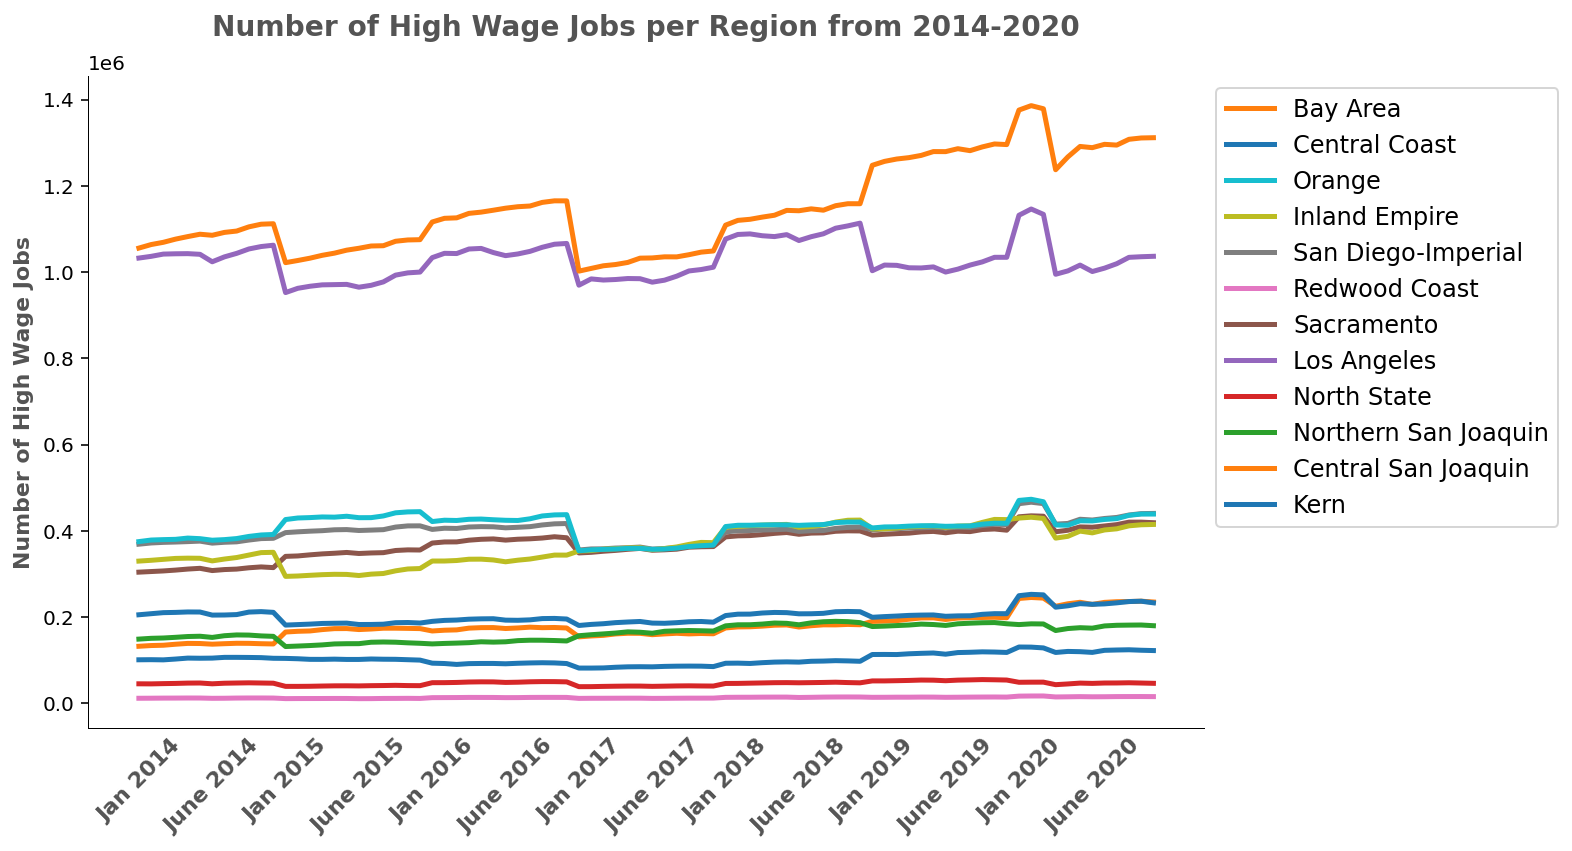

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['High Wage Count'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['High Wage Count'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['High Wage Count'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['High Wage Count'].values, lw=2.5, label='North State')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('Number of High Wage Jobs per Region from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Number of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

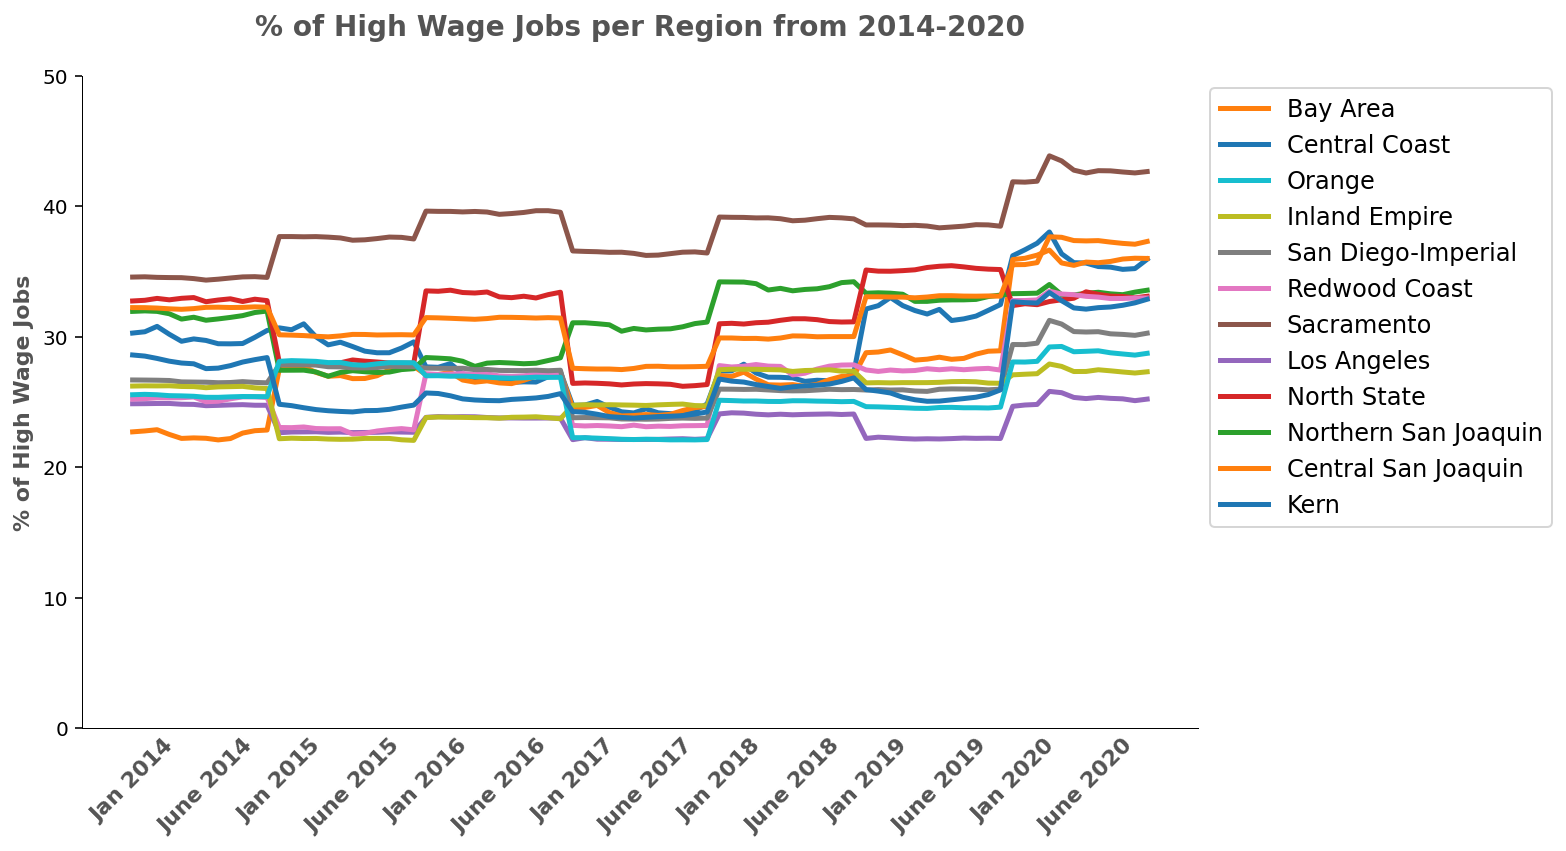

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_kern['Percentage'].values, lw=2.5, label='Kern')
ax.plot(hw_csj['Percentage'].values, lw=2.5, label='Central San Joaquin')
ax.plot(hw_nsj['Percentage'].values, lw=2.5, label='Northern San Joaquin')
ax.plot(hw_ns['Percentage'].values, lw=2.5, label='North State')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan 2014', 'June 2014', 'Jan 2015', 'June 2015', 'Jan 2016', 'June 2016', 
                    'Jan 2017', 'June 2017', 'Jan 2018', 'June 2018', 
                    'Jan 2019', 'June 2019', 'Jan 2020', 'June 2020'], 
                   fontsize=11, weight='bold', color = '#545454', rotation = 45)
ax.set_title('% of High Wage Jobs per Region from 2014-2020', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 84, 6))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0, 50)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

## Miscellaneous Plots

#### Histogram of wages for Kern and Inland Empire  in 2018

In [131]:
ca_ipums_2018 = cleaned_ipums('2018')
ca_ipums_2018 = ca_ipums_2018.loc[ca_ipums_2018.index.repeat(ca_ipums_2018.PERWT)].reset_index(drop=True)

In [132]:
wages = pd.merge(ca_ipums_2018, county_info, on='COUNTYFIP')
wages = wages.drop_duplicates(subset=['YEAR', 'COUNTYFIP', 'INDNAICS', 'PERWT', 'INCWAGE', 'NAICS Code', 'Industry Title', 'Industry', 'County', 'Rural/Urban', 'CDI Regions', 'CERF Regions', 'Population'])
kern_wages = wages.loc[wages['CERF Regions'] == 'Kern']
ie_wages = wages.loc[wages['CERF Regions'] == 'Inland Empire']

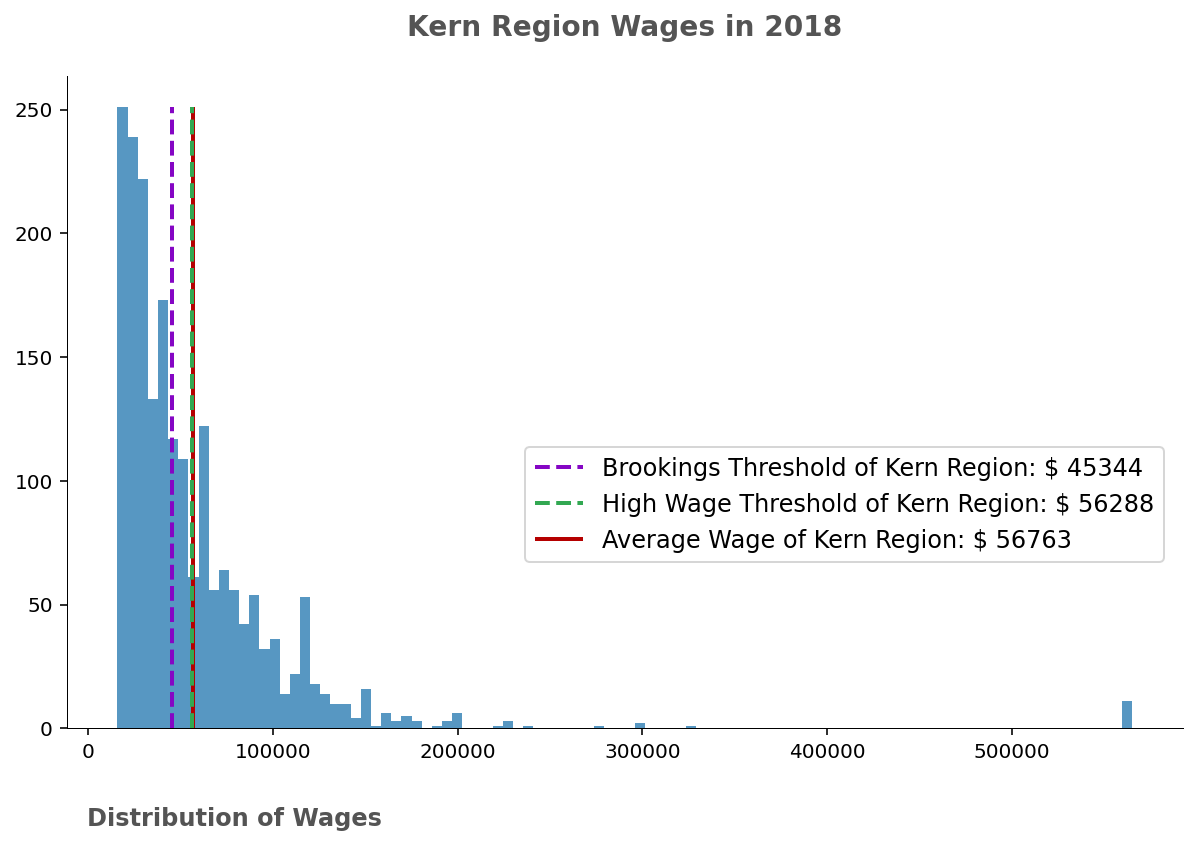

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(kern_wages['INCWAGE'], bins=100, color='#5797c2')

ax.set_xlabel("Distribution of Wages", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.15, -0.12)

ax.set_title(f'Kern Region Wages in 2018', 
             fontsize=14, weight='bold', pad=20, color='#545454')

y, x_, _ = ax.hist(kern_wages['INCWAGE'], bins=100, color='#5797c2')

# avg wage in Kern
avg_wage = np.mean(kern_wages['INCWAGE'])
ax.vlines(x=avg_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, label=f'Average Wage of Kern Region: $ {round(avg_wage)}')

# CAFWD threshold in Kern
ax.vlines(x=56288, ymin=0, ymax=y.max(), 
          color='#32a852', lw=2, ls='dashed', label=f'High Wage Threshold of Kern Region: $ 56288')

# Brookings Threshold in Kern
ax.vlines(x=45344, ymin=0, ymax=y.max(), 
          color='#8506c4', lw=2, ls='dashed', label=f'Brookings Threshold of Kern Region: $ 45344')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.45), loc='upper left', fontsize=12)

plt.show()    

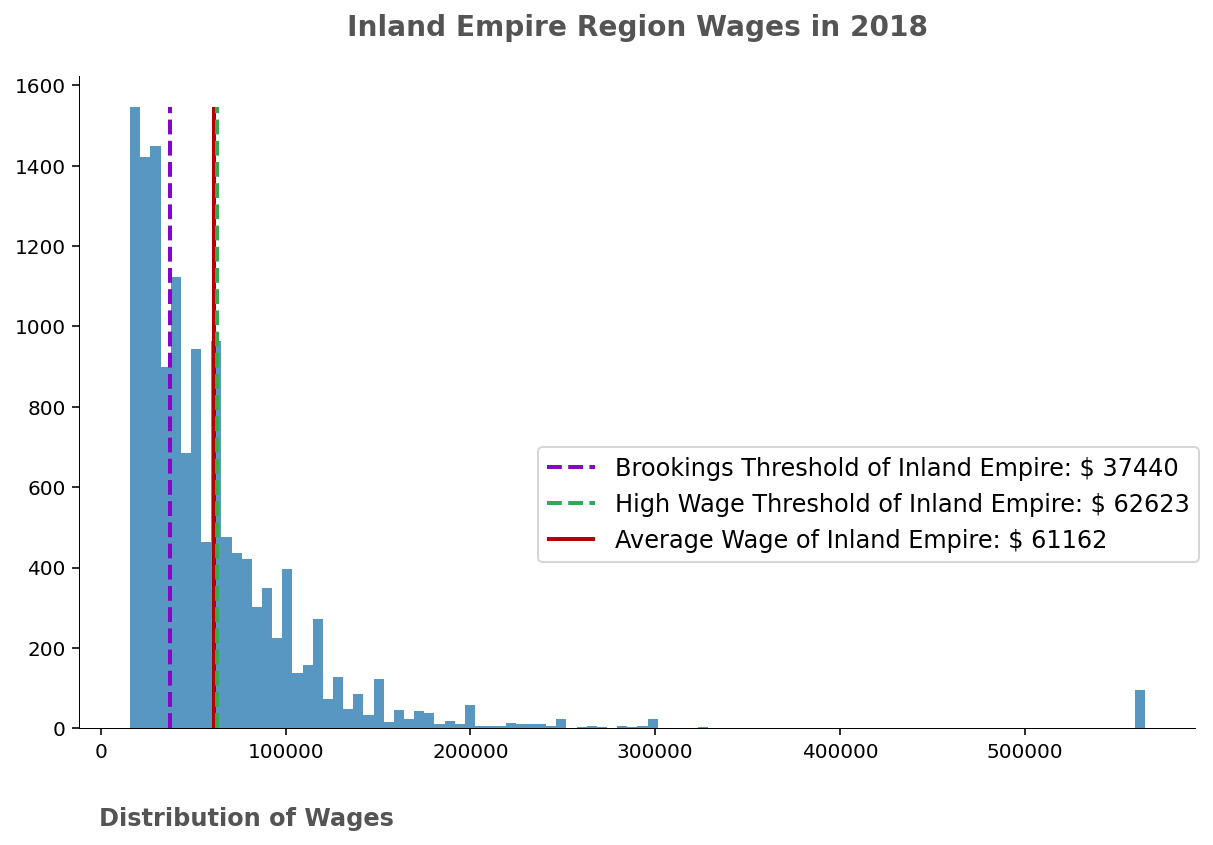

In [141]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(ie_wages['INCWAGE'], bins=100, color='#5797c2')

ax.set_xlabel("Distribution of Wages", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.15, -0.12)

ax.set_title(f'Inland Empire Region Wages in 2018', 
             fontsize=14, weight='bold', pad=20, color='#545454')

y, x_, _ = ax.hist(ie_wages['INCWAGE'], bins=100, color='#5797c2')

# avg wage in IE
avg_wage = np.mean(ie_wages['INCWAGE'])
ax.vlines(x=avg_wage, ymin=0, ymax=y.max(), 
          color='#b50000', lw=2, label=f'Average Wage of Inland Empire: $ {round(avg_wage)}')

# CAFWD threshold in IE
ax.vlines(x=62623, ymin=0, ymax=y.max(), 
          color='#32a852', lw=2, ls='dashed', label=f'High Wage Threshold of Inland Empire: $ 62623')

# Brookings threshold in IE
ax.vlines(x=37440, ymin=0, ymax=y.max(), 
          color='#8506c4', lw=2, ls='dashed', label=f'Brookings Threshold of Inland Empire: $ 37440')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.4, 0.45), loc='upper left', fontsize=12)

plt.show()    